---
#### 1) otu tables (count tables with otus that have more than 10 read in at least 5 samples) generated for each time point (season of sampling) in total 11 time point.
#### 2) tables used to calculated correlations between otus using Fastspar packages (https://github.com/scwatts/fastspar)
#### 3) results of correlation analysis were used to calculated cohesion and result of cohesion visualized and correlated with diversity and environmental factors
#### 4) Networks visualized in Cytoscape program.
---

In [1]:
#setworking directory to AbioticAraMicrobe/
setwd('../')

In [2]:
# load packages
library(ggplot2)
library(tidyr )
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




----
#### 1) otu tables (count tables with otus that have more than 10 read in at least 5 samples) generated for each time point (season of sampling) in total 11 time point.

In [4]:
# open otu tables for bacteria, fungi and Eukaryotes , add taxonmony information to name of each otu (it is not needed for analysis)
#Bacteria 
data <- read.table("data/DataClean/BV5Otu.txt" , header = T)
firstotuname = "Otu000002"
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)
n
dataB <- data[-c(1:n-1)]
dim(dataB)
Taxa <- read.table("data/DataClean/BV5Taxa.txt" , header = T)
Taxa$name <- paste(Taxa$OTU,"B" , Taxa$Genus, sep = "_" )
dataB <- merge(Taxa[c("OTU" , "name")] , t(dataB) , by.x = "OTU" , by.y = "row.names")
rownames(dataB) <- dataB$name
dataB <- t(dataB[-c(1,2)])
#F
data <- read.table("data/DataClean/FITS2Otu.txt" , header = T)
firstotuname = "Otu00002"
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)
n
dataF <- data[-c(1:n-1)]
dim(dataF)
Taxa <- read.table("data/DataClean/FITS2Taxa.txt" , header = T)
Taxa$name <- paste(Taxa$OTU,"F" , Taxa$Genus, sep = "_" )
dataF <- merge(Taxa[c("OTU" , "name")] , t(dataF) , by.x = "OTU" , by.y = "row.names")
rownames(dataF) <- dataF$name
dataF <- t(dataF[-c(1,2)])
#O
data <- read.table("data/DataClean/PV9Otu.txt" , header = T)
firstotuname = "Otu00002"
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)
n
dataO <- data[-c(1:n-1)]
Taxa <- read.table("data/DataClean/PV9Taxa.txt" , header = T)
Taxa$name <- paste(Taxa$OTU,"O" , Taxa$Genus, sep = "_" )
dataO <- merge(Taxa[c("OTU" , "name")] , t(dataO) , by.x = "OTU" , by.y = "row.names")
rownames(dataO) <- dataO$name
dataO <- t(dataO[-c(1,2)])
dim(dataO)
print(paste(dim(dataB) , dim(dataF) , dim(dataO)))

data_all <- merge(dataB , dataF , by = "row.names" , all.x = TRUE , all.y = TRUE)
dim(data_all)
rownames(data_all) <- data_all$Row.names
data_all <- data_all[-c(1)]
data_all <- merge(data_all , dataO , by = "row.names" , all.x = TRUE , all.y = TRUE)
dim(data_all)
NA_DF <- data_all[rowSums(is.na(data_all)) > 0,]

sample <- read.table("data/metadata.txt" , header = TRUE)  
sample <- sample[!(duplicated(sample$Samplenumber)) , ]
sample$sy <- paste(sample$Season , sample$Year , sep = "")
data_all <- merge( x = sample[c("Samplenumber" , "Season" , "Year" , "sy")] , y = data_all , by.x = "Samplenumber" , by.y = "Row.names" , all.y = TRUE)      #5 sample , atleast 10 reads   
dim(data_all)
data_all <- data_all[!(rowSums(is.na(data_all)) !=0),]
rownames(data_all) <- data_all$Samplenumber
dim(data_all)




[1] 15

[1]  699 5502

[1] 15

[1]  689 2144

[1] 15

[1]  699 1402

[1] "699 689 699"    "5502 2144 1402"


[1]  703 7647

[1]  703 9049

[1]  703 9052

[1]  681 9052

In [5]:
head(data_all)

Samplenumber Season Year sy         Otu000002_B_Sphingomonas
S1   S1           Spring 2014 Spring2014  15                     
S10  S10          Fall   2014 Fall2014   234                     
S100 S100         Fall   2014 Fall2014   508                     
S101 S101         Fall   2014 Fall2014    53                     
S102 S102         Fall   2014 Fall2014     0                     
S103 S103         Spring 2015 Spring2015   5                     
     Otu000003_B_Methylobacterium-Methylorubrum Otu000004_B_Duganella
S1    50                                        242                  
S10  672                                        105                  
S100 172                                          7                  
S101  14                                         11                  
S102   6                                        939                  
S103   0                                         16                  
     Otu000005_B_Pseudomonas Otu000006_B_Pseudomonas Otu000009_B_Flavobacterium
S1   385                      0                      171                       
S10   60                      0                      462                       
S100   6                     62                        6                       
S101  27                     25                        0                       
S102   0                      3                        5                       
S103   1                     26                        0                       
     ⋯ Otu03213_O_Rhogostoma-lineage_unclassified Otu03217_O_Cyanidiales_XX
S1   ⋯ 0                                          0                        
S10  ⋯ 0                                          0                        
S100 ⋯ 0                                          0                        
S101 ⋯ 0                                          0                        
S102 ⋯ 0                                          0                        
S103 ⋯ 0                                          0                        
     Otu03220_O_Chlamydomonas Otu03222_O_Gregarinidae_unclassified
S1   0                        0                                   
S10  0                        0                                   
S100 0                        0                                   
S101 0                        0                                   
S102 0                        0                                   
S103 0                        0                                   
     Otu03223_O_Oomycota_X_unclassified Otu03227_O_WIM-1-lineage_X
S1   0                                  0                         
S10  0                                  0                         
S100 0                                  0                         
S101 0                                  0                         
S102 0                                  0                         
S103 0                                  0                         
     Otu03228_O_Mycetozoa-Myxogastrea_unclassified
S1   0                                            
S10  0                                            
S100 0                                            
S101 0                                            
S102 0                                            
S103 0                                            
     Otu03229_O_Leptomyxidae_unclassified
S1   0                                   
S10  0                                   
S100 0                                   
S101 0                                   
S102 0                                   
S103 0                                   
     Otu03230_O_Rhogostoma-lineage_unclassified
S1   0                                         
S10  0                                         
S100 0                                         
S101 0                                         
S102 0                                         
S103 0                                         
     Otu03231_O_Stramenopiles_unclas

In [5]:
#For each time point make a file ajnd save it in its own directory
#dir.create('data/corr_network')
listSeason <- c(unique(data_all$sy))
for(i in listSeason){
    dir.create(paste("data/corr_network" , "/" , i , sep =""))
    s <- data_all[data_all$sy ==i , -c(1:4)]
    s <-  data.frame(t(s[,colSums(s>=10)>=5]))
    s <- tibble::rownames_to_column(s, "#OTU ID")
    print(i)
    print(dim(s))
    write.table(s, paste("data/corr_network/" ,i, "/" , "data.txt" , sep =""), quote = F , sep = "\t" , col.names = T , row.names = F)
}


[1] "Spring2014"
[1] 473  50
[1] "Fall2014"
[1] 912  62
[1] "Spring2015"
[1] 600  56
[1] "Fall2015"
[1] 770  66
[1] "Spring2016"
[1] 881  66
[1] "Fall2016"
[1] 804  60
[1] "Spring2017"
[1] 789  77
[1] "Fall2017"
[1] 717  69
[1] "Fall2018"
[1] 447  56
[1] "Spring2019"
[1] 644  63
[1] "Spring2018"
[1] 598  67


---
#### 2) tables used to calculated correlations between otus using Fastspar packages (https://github.com/scwatts/fastspar). Bellow you will see the script (data/corr_network/*/runsparcc.sh). (Note, result of correlations are in this path: data/corr_network/outputs/*)

In [ ]:
#this steps were done in command line:
#step1 create two directories for keeping bootstraped files and correlations of bootstraped files
mkdir bootstrap_counts bootstrap_correlation

#step2 Correlation inference
fastspar --otu_table data.txt  --correlation median_correlation.tsv --covariance median_covariance.tsv > log1

#step3 make 1000 file on the main file data.txt save them in bootstrap_counts folder
fastspar_bootstrap --otu_table data.txt  --number 1000 --prefix bootstrap_counts/ > log2

#step4 calculatr cooralation on the bootstrap 1000  files that are in bootstrap_counts folder and save them in bootstrap_correlation folder
parallel -j 12 fastspar --otu_table {} --correlation bootstrap_correlation/cor{/} --covariance bootstrap_correlation/cov{/} -i 50 ::: bootstrap_counts/*  > log3
#step5 took median_correlation.tsv (cooralation of main input file) and 1000 cooralation files that are in bootstrap_correlation and calculatr pvalue.
fastspar_pvalues --otu_table data.txt    --correlation median_correlation.tsv --prefix bootstrap_correlation/cor --permutations 1000 --outfile pvalues.tsv > log4

---
#### 3) results of correlation analysis were used to calculated cohesion and result of cohesion visualized and correlated with diversity and environmental factors

In [3]:
#open correlation and pvalue file for each time point.
#keep only significant pvalues (pvalue <=0.001)

setwd('data/corr_network/outputs')
count = 0
finalfile <- data.frame()
for ( i in list.dirs()){
        print(i)
        count = count + 1
        if (count >1){
            Pvals <- read.table(file = paste(i,"/" , "pvalues.tsv" , sep=""), sep="\t", header=T, row.names=1,  comment.char = "") #pvalue file 
            Pvals1 <- as.matrix(Pvals)
            Pvals1[upper.tri(Pvals, diag=TRUE)]<- NA
            Pvals2 <- as.data.frame(as.table(Pvals1))
            colnames(Pvals2)<-c("Node1","Node2","Pvalue")
            Cors <- read.table(file = paste(i,"/" , "median_correlation.tsv" , sep=""), sep="\t", header=T, row.names=1 , comment.char = "") #correlation file
            Cors1 <- as.matrix(Cors)
            Cors1[upper.tri(Cors1, diag=TRUE)]<-NA
            Cors2 <- as.data.frame(as.table(Cors1))
            colnames(Cors2)<-c("Node1","Node2","Cor")
            Edge_table <- cbind(Pvals2,Cors2$Cor, deparse.level=2)
            Edge_table_final <- Edge_table[!is.na(Edge_table$Pvalue),]
            colnames(Edge_table_final) <- c("Node1","Node2","Pvalue","Cor")
            #Edge_table_final1 = Edge_table_final
            Edge_table_final1 <- Edge_table_final[Edge_table_final$Pvalue <= 0.001 ,]
            Edge_table_final1 <- subset(Edge_table_final1,abs(Edge_table_final1$Cor)>0)
            Edge_table_final1$CorrB <- ifelse(Edge_table_final1$Cor >=0, "Positive", "Negative")
            print(basename(i))
            print(dim(Edge_table_final1))
            Edge_table_final1$data <- basename(i)
            finalfile <- rbind(finalfile , Edge_table_final1)
        }
}

[1] "."
[1] "./Fall2014"
[1] "Fall2014"
[1] 10209     5
[1] "./Fall2015"
[1] "Fall2015"
[1] 7606    5
[1] "./Fall2016"
[1] "Fall2016"
[1] 5499    5
[1] "./Fall2017"
[1] "Fall2017"
[1] 7447    5
[1] "./Fall2018"
[1] "Fall2018"
[1] 4267    5
[1] "./Spring2014"
[1] "Spring2014"
[1] 1978    5
[1] "./Spring2015"
[1] "Spring2015"
[1] 3093    5
[1] "./Spring2016"
[1] "Spring2016"
[1] 12976     5
[1] "./Spring2017"
[1] "Spring2017"
[1] 12553     5
[1] "./Spring2018"
[1] "Spring2018"
[1] 7424    5
[1] "./Spring2019"
[1] "Spring2019"
[1] 6440    5


----
#### plot amount of nods (otus) and edges(correlations) per time point

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”



  Fall2014   Fall2015   Fall2016   Fall2017   Fall2018 Spring2014 Spring2015 
       869        738        772        673        395        435        559 
Spring2016 Spring2017 Spring2018 Spring2019 
       859        752        578        624 

Var1       Freq type
1 Fall2014   869  node
2 Fall2015   738  node
3 Fall2016   772  node
4 Fall2017   673  node
5 Fall2018   395  node
6 Spring2014 435  node

Var1       Freq.x type.x time.x     Freq.y time.y     type.y
1  Fall2014   869    node   Fall2014   10209  Fall2014   edge  
2  Fall2015   738    node   Fall2015    7606  Fall2015   edge  
3  Fall2016   772    node   Fall2016    5499  Fall2016   edge  
4  Fall2017   673    node   Fall2017    7447  Fall2017   edge  
5  Fall2018   395    node   Fall2018    4267  Fall2018   edge  
6  Spring2014 435    node   Spring2014  1978  Spring2014 edge  
7  Spring2015 559    node   Spring2015  3093  Spring2015 edge  
8  Spring2016 859    node   Spring2016 12976  Spring2016 edge  
9  Spring2017 752    node   Spring2017 12553  Spring2017 edge  
10 Spring2018 578    node   Spring2018  7424  Spring2018 edge  
11 Spring2019 624    node   Spring2019  6440  Spring2019 edge

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


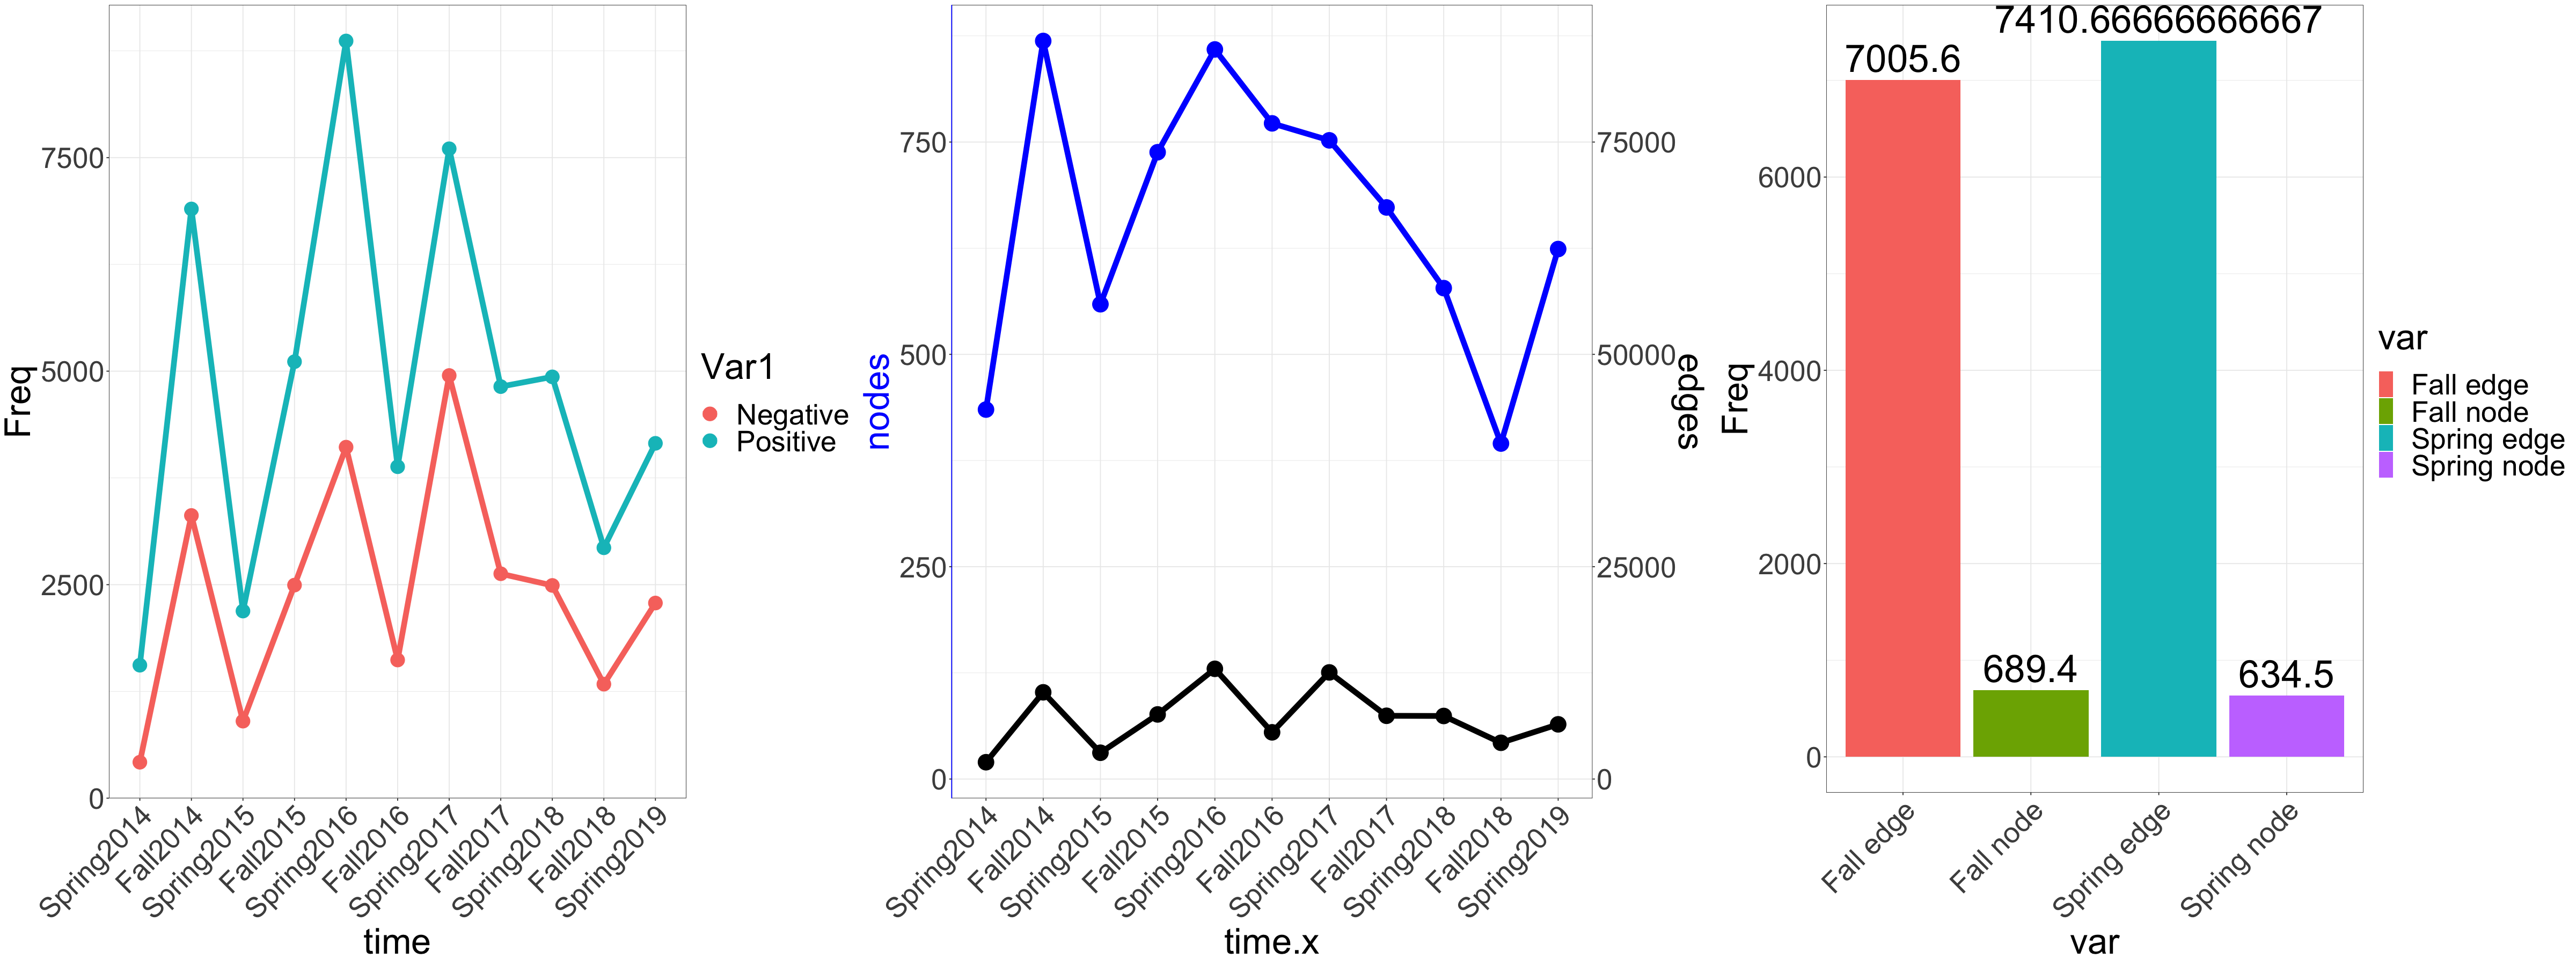

In [4]:
d1 <- data.frame(table(finalfile$CorrB , finalfile$data))
d1$time <- factor(d1$Var2 , levels= c("Spring2014" , "Fall2014" , "Spring2015" , "Fall2015" , "Spring2016" , "Fall2016" , "Spring2017" , "Fall2017" , "Spring2018" , "Fall2018" , "Spring2019" ))
p1 = ggplot(d1, aes(x=time , y = Freq , group = Var1 , color = Var1)) + geom_line(size =3) + geom_point(size = 7) + theme_bw() + theme(text = element_text(size = 40 , colour = "black")  , axis.text.x = element_text(angle = 45 , hjust = 1))
d1 <- separate(data = d1 , col = Var2 , c("season" , "year") , sep = "20")

finalfile1 <- finalfile
finalfile1$node1_time <- paste(finalfile1$Node1 , finalfile1$data , sep = "_")
finalfile1$node2_time <- paste(finalfile1$Node2 , finalfile1$data , sep = "_")

node1 <- finalfile1[,c("node1_time" , "data")]
colnames(node1) <- c("node" , "time")
node2 <- finalfile1[,c("node2_time" , "data")]
colnames(node2) <- c("node" , "time")
nodes <- rbind(node1 , node2)
nodes$node = gsub("_B_","_B_sepfromhere_",nodes$node)
nodes$node = gsub("_F_","_F_sepfromhere_",nodes$node)
nodes$node = gsub("_O_","_O_sepfromhere_",nodes$node)
nodes = separate(nodes,node, sep = "sepfromhere" , into = c("OTU" , "microbe"))
nodes$name <- paste(nodes$OTU , nodes$time , sep = "_,_")
nodes_uniqe <- nodes[!(duplicated(nodes$name)) , ]


n_nodes <- data.frame(table(nodes_uniqe$time))
n_nodes$type = "node"
table(nodes_uniqe$time)
head(n_nodes)
n_nodes$time <- factor(n_nodes$Var1 , levels= c("Spring2014" , "Fall2014" , "Spring2015" , "Fall2015" , "Spring2016" , "Fall2016" , "Spring2017" , "Fall2017" , "Spring2018" , "Fall2018" , "Spring2019" ))

n_edges <- data.frame(table(finalfile$data))
n_edges$time <- factor(n_edges$Var1 , levels= c("Spring2014" , "Fall2014" , "Spring2015" , "Fall2015" , "Spring2016" , "Fall2016" , "Spring2017" , "Fall2017" , "Spring2018" , "Fall2018" , "Spring2019" ))
n_edges$type = "edge"


scale = 100
node_edge = merge(n_nodes , n_edges , by = "Var1")
node_edge
p2 = ggplot(node_edge, aes(x=time.x , y = Freq.x , group = 1)) + geom_line(size =3 , color = "blue") + geom_point(size =8 , color = "blue") + 
geom_line(aes(y = Freq.y/scale) , size = 3)  +geom_point(aes(y = Freq.y/scale) , size = 8) + 
scale_y_continuous(sec.axis = sec_axis(~.*scale, name="edges")) + 
theme_bw() + theme(text = element_text(size = 40 , colour = "black")  ,  axis.title.y.left = element_text(color = "blue") ,axis.line.y.left = element_line(color = "blue") , axis.text.x = element_text(angle = 45 , hjust = 1)) + labs(y = "nodes") 

df <- rbind(n_nodes , n_edges) 
df = separate(data = df , col = Var1 , c("season" , "year") , sep = "20")
df = df %>% group_by(season,type) %>% 
  summarise(Freq=mean(Freq)) 
df$var = paste(df$season , df$type)
p3 = ggplot(df, aes(x=var , y = Freq , fill = var)) + geom_bar( stat="identity")  + theme_bw() + theme(text = element_text(size = 40 , colour = "black") , axis.text.x = element_text(angle = 45 , hjust = 1) ) +
geom_text(aes(label=Freq), vjust=-0.3, size=15)

library(ggpubr)
plots <- ggarrange(p1,p2 , p3 , ncol = 3)
options(repr.plot.width=40, repr.plot.height=15)
plots
ggsave("../../../plots/amounts_Of_nodes_edges.pdf" , plots , width = 45 , height = 15 )


----
## calculate cohesion
----
#### open file contains significant correlations which generated in previous steps (finalfile)
#### each rows of that files shows correlation between two microbes (Node1,Node2). Here, in order to have correlation per microbes, we first separated the Node1 and Node2 columns from  finalfile1 and we latter combined them (rbind) to generate a dataframe called (nodes)

In [5]:

finalfile1 <- finalfile
head(finalfile1)
node1 <- finalfile1[,-c(2,6)]
colnames(node1) <- c("node" , "Pvalue","Cor","CorrB")
node2 <- finalfile1[,-c(1,6)]
colnames(node2) <- c("node" , "Pvalue","Cor","CorrB")
nodes <- rbind(node1 , node2)
nodes$node = gsub("_B_","_B_sepfromhere_",nodes$node) #B for bacteria
nodes$node = gsub("_F_","_F_sepfromhere_",nodes$node) #F for Fungi
nodes$node = gsub("_O_","_O_sepfromhere_",nodes$node) #O for Eukaryotes
nodes = separate(nodes,node, sep = "_sepfromhere_" , into = c("OTUTaxa" , "microbe") , remove = FALSE)
nodes <- separate(data = nodes , OTUTaxa , into = c("OTU" , "Taxa") , sep = "_" , remove= FALSE)
head(nodes)

Node1                                                         
18  Otu000024_B_Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium
54  Otu000072_B_Sphingomonas                                      
924 Otu000015_B_Sphingomonas                                      
925 Otu000016_B_Methylobacterium-Methylorubrum                    
931 Otu000027_B_Bosea                                             
934 Otu000033_B_Aureimonas                                        
    Node2                                      Pvalue Cor    CorrB    data    
18  Otu000002_B_Sphingomonas                   0.001  0.3919 Positive Fall2014
54  Otu000002_B_Sphingomonas                   0.001  0.4715 Positive Fall2014
924 Otu000003_B_Methylobacterium.Methylorubrum 0.001  0.5118 Positive Fall2014
925 Otu000003_B_Methylobacterium.Methylorubrum 0.001  0.5659 Positive Fall2014
931 Otu000003_B_Methylobacterium.Methylorubrum 0.001  0.5217 Positive Fall2014
934 Otu000003_B_Methylobacterium.Methylorubrum 0.001  0.4105 Positive Fall2014

node                                                                      
18  Otu000024_B_sepfromhere_Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium
54  Otu000072_B_sepfromhere_Sphingomonas                                      
924 Otu000015_B_sepfromhere_Sphingomonas                                      
925 Otu000016_B_sepfromhere_Methylobacterium-Methylorubrum                    
931 Otu000027_B_sepfromhere_Bosea                                             
934 Otu000033_B_sepfromhere_Aureimonas                                        
    OTUTaxa     OTU       Taxa
18  Otu000024_B Otu000024 B   
54  Otu000072_B Otu000072 B   
924 Otu000015_B Otu000015 B   
925 Otu000016_B Otu000016 B   
931 Otu000027_B Otu000027 B   
934 Otu000033_B Otu000033 B   
    microbe                                            Pvalue Cor    CorrB   
18  Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium 0.001  0.3919 Positive
54  Sphingomonas                                       0.001  0.4715 Positive
924 Sphingomonas                                       0.001  0.5118 Positive
925 Methylobacterium-Methylorubrum                     0.001  0.5659 Positive
931 Bosea                                              0.001  0.5217 Positive
934 Aureimonas                                         0.001  0.4105 Positive

---
#### for each otu calculate the average of negative and positive correlations

In [6]:
mean_cor <-  nodes %>% group_by(OTUTaxa , CorrB) %>% summarise(
  mean_cor = mean(Cor))

head(mean_cor)

`summarise()` has grouped output by 'OTUTaxa'. You can override using the
`.groups` argument.


OTUTaxa     CorrB    mean_cor  
1 Otu000002_B Negative -0.3613111
2 Otu000002_B Positive  0.4342356
3 Otu000003_B Negative -0.3341853
4 Otu000003_B Positive  0.4704991
5 Otu000004_B Negative -0.3816080
6 Otu000004_B Positive  0.4492460

---
#### open otu tables and merge them to a dataframe called (data_all)

In [7]:
#set working directory to AbioticAraMicrobe
setwd('../../../../AbioticAraMicrobe/')

#Bacteria 
data <- read.table("data/DataClean/BV5Otu.txt" , header = T)
firstotuname = "Otu000002"
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)
n
dataB <- data[-c(1:n-1)]
dim(dataB)
Taxa <- read.table("data/DataClean/BV5Taxa.txt" , header = T)
Taxa$name <- paste(Taxa$OTU,"B", sep = "_" )
dataB <- merge(Taxa[c("OTU" , "name")] , t(dataB) , by.x = "OTU" , by.y = "row.names")
rownames(dataB) <- dataB$name
dataB <- t(dataB[-c(1,2)])
#F
data <- read.table("data/DataClean/FITS2Otu.txt" , header = T)
firstotuname = "Otu00002"
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)
n
dataF <- data[-c(1:n-1)]
dim(dataF)
Taxa <- read.table("data/DataClean/FITS2Taxa.txt" , header = T)
Taxa$name <- paste(Taxa$OTU,"F" , sep = "_" )
dataF <- merge(Taxa[c("OTU" , "name")] , t(dataF) , by.x = "OTU" , by.y = "row.names")
rownames(dataF) <- dataF$name
dataF <- t(dataF[-c(1,2)])
#O
data <- read.table("data/DataClean/PV9Otu.txt" , header = T)
firstotuname = "Otu00002"
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)
n
dataO <- data[-c(1:n-1)]
Taxa <- read.table("data/DataClean/PV9Taxa.txt" , header = T)
Taxa$name <- paste(Taxa$OTU,"O", sep = "_" )
dataO <- merge(Taxa[c("OTU" , "name")] , t(dataO) , by.x = "OTU" , by.y = "row.names")
rownames(dataO) <- dataO$name
dataO <- t(dataO[-c(1,2)])
dim(dataO)
print(paste(dim(dataB) , dim(dataF) , dim(dataO)))


data_all <- merge(dataB , dataF , by = "row.names" , all.x = TRUE , all.y = TRUE)
dim(data_all)
rownames(data_all) <- data_all$Row.names
data_all <- data_all[-c(1)]
data_all <- merge(data_all , dataO , by = "row.names" , all.x = TRUE , all.y = TRUE)
dim(data_all)
NA_DF <- data_all[rowSums(is.na(data_all)) > 0,]

sample <- read.table("data/metadata.txt" , header = TRUE)  
sample <- sample[!(duplicated(sample$Samplenumber)) , ]
sample$sy <- paste(sample$Season , sample$Year , sep = "")
data_all <- merge( x = sample[c("Samplenumber" , "Season" , "Year" , "sy" , 'Site')] , y = data_all , by.x = "Samplenumber" , by.y = "Row.names" , all.y = TRUE)      #5 sample , atleast 10 reads   
dim(data_all)
data_all <- data_all[!(rowSums(is.na(data_all)) !=0),]
rownames(data_all) <- data_all$Samplenumber
dim(data_all)

[1] 15

[1]  699 5502

[1] 15

[1]  689 2144

[1] 15

[1]  699 1402

[1] "699 689 699"    "5502 2144 1402"


[1]  703 7647

[1]  703 9049

[1]  703 9053

[1]  681 9053

In [8]:
head(data_all)
head(mean_cor)

Samplenumber Season Year sy         Site Otu000002_B Otu000003_B
S1   S1           Spring 2014 Spring2014 WH    15          50        
S10  S10          Fall   2014 Fall2014   WH   234         672        
S100 S100         Fall   2014 Fall2014   ERG  508         172        
S101 S101         Fall   2014 Fall2014   ERG   53          14        
S102 S102         Fall   2014 Fall2014   ERG    0           6        
S103 S103         Spring 2015 Spring2015 ERG    5           0        
     Otu000004_B Otu000005_B Otu000006_B ⋯ Otu03213_O Otu03217_O Otu03220_O
S1   242         385          0          ⋯ 0          0          0         
S10  105          60          0          ⋯ 0          0          0         
S100   7           6         62          ⋯ 0          0          0         
S101  11          27         25          ⋯ 0          0          0         
S102 939           0          3          ⋯ 0          0          0         
S103  16           1         26          ⋯ 0          0          0         
     Otu03222_O Otu03223_O Otu03227_O Otu03228_O Otu03229_O Otu03230_O
S1   0          0          0          0          0          0         
S10  0          0          0          0          0          0         
S100 0          0          0          0          0          0         
S101 0          0          0          0          0          0         
S102 0          0          0          0          0          0         
S103 0          0          0          0          0          0         
     Otu03231_O
S1   0         
S10  0         
S100 0         
S101 0         
S102 0         
S103 0

OTUTaxa     CorrB    mean_cor  
1 Otu000002_B Negative -0.3613111
2 Otu000002_B Positive  0.4342356
3 Otu000003_B Negative -0.3341853
4 Otu000003_B Positive  0.4704991
5 Otu000004_B Negative -0.3816080
6 Otu000004_B Positive  0.4492460

---
### make cohesion file (positive and negative) per sample
#### for this you need to multiply average correlation of each microbes which are in this data frame:(mean_cor) to relative abundance of each microbes in all the samples(df dataframe)
#### then calculate the sum of each sample (temp1 dataframe)
#### do these steps two times (for positive and negative correlations, for (corT in correlation_type)) 
#### at the end we have tow number per sample Positive and negative cohesion per sample , df2 dataframe and then with some modification df3 dataframe)

In [19]:
library(funrar)
df <- data_all
firstcol = which(colnames(df)=="Otu000002_B")

rownames(df) <- df$Samplenumber
df[c(firstcol:ncol(df))] <- make_relative(as.matrix(df[c(firstcol:ncol(df))]))
df1 <- df[c(firstcol:ncol(df))]
correlation_type = c("Positive" ,"Negative")
df2 = data.frame()
for (corT in correlation_type){
            data = df1
            cor = mean_cor[(mean_cor$CorrB == corT) ,]
            data1 = data.frame(t(data[ , colnames(data) %in% cor$OTUTaxa ]))
            data1.sorted = data1[order(rownames(data1)),]
            cor <- cor[cor$OTUTaxa %in% rownames(data1.sorted), ]
            cor1 = cor[match(rownames(data1.sorted), cor$OTUTaxa),]
            print(identical(cor1$OTUTaxa,row.names(data1.sorted)))
            temp <- data1.sorted * cor1$mean_cor
            temp1 <- data.frame(colSums(temp))
            colnames(temp1)= "cohesion"
            temp1$coralation_type= corT
            temp1$sampleN= rownames(temp1)
            df2 = rbind(df2,temp1)
}

df3 <- merge(df2 , df[c(1:5)] , by.x = "sampleN" , by.y = "Samplenumber")
df3$site_season_year=paste(df3$Site,df3$Season,df3$Year , sep='_')
head(df3)

[1] TRUE
[1] TRUE


sampleN cohesion   coralation_type Season Year sy         Site
1 S1       0.3400065 Positive        Spring 2014 Spring2014 WH  
2 S1      -0.2683229 Negative        Spring 2014 Spring2014 WH  
3 S10     -0.3024784 Negative        Fall   2014 Fall2014   WH  
4 S10      0.3509325 Positive        Fall   2014 Fall2014   WH  
5 S100    -0.3267649 Negative        Fall   2014 Fall2014   ERG 
6 S100     0.3618300 Positive        Fall   2014 Fall2014   ERG 
  site_season_year
1 WH_Spring_2014  
2 WH_Spring_2014  
3 WH_Fall_2014    
4 WH_Fall_2014    
5 ERG_Fall_2014   
6 ERG_Fall_2014

---
### add environmental factors to df3 dataframe to get 'dfall' dataframe (contains environmental factors and cohesions(positive and negative) per samples )

In [29]:
library(reshape2)
env_data <- read.table("data/environmental_data.txt" , header = TRUE)
env_data <- separate(data = env_data , col = variable , into = c("Month1" , "Season") , sep = "_" , remove = FALSE)
d1 <- data.frame("envdata"=unique(env_data$env_factor))
#add full names of env factors
d1$environmentalfactor <- c("Precipitation" , "Vapor_Pressure_Deficit" , "Palmer_Drought_Severity_Index" , "Soil_Moisture" , "Runoff" , "Downward_Surface_Shortwave_Radiation" , "Climate_Water_Deficit" , "Actual_Evapotranspiration" , "Vapor_Pressure" , 
                            "Min_Temperature" , "Snow_Water_Equivalent" , "Potential_Evapotranspiration" , "Max_Temperature" , "Wind_Speed")

env_data <- merge(env_data , d1 , by.x = "env_factor" , by.y = "envdata")
env_data$env_value = env_data$value
env_data$season_site <- paste(env_data$Season,env_data$Site)
env_data$site_season_year = paste(env_data$Site , env_data$Season , env_data$Year , sep = "_" ) ###########################################data1
#head(env_data)

#spread env data in different columns
env_data_count <- env_data[c("site_season_year" , "environmentalfactor" , "env_value")] %>% spread(environmentalfactor,env_value) ########################data2
#head(env_data_count)

#normalized env data 
#normalize the environmental data , first group them then do normalization this is z transformation 
stdize=function(x) {(x - mean(x))/sd(x)}
#stdize=function(x) {log10((x/sum(x))+1)}
env_data_norm <- data.frame(env_data_count[1] , apply(env_data_count[2:ncol(env_data_count)] ,2, stdize)) #2 is the margin , apply on the columns ########################data3
#head(env_data_norm)
env_data_melt <- melt(env_data_norm ,id ="site_season_year" ,   variable.name = "env_factor" , value.name = "env_value_norm")
d1 <- env_data_melt

d2 = d1%>% spread(env_factor,env_value_norm)

df4 = merge(df3 , d2 , by= "site_season_year")
dfall <- df4
write.table(dfall ,'data/corr_network/outputs/cohesion_allTaxaTogether.csv' ,sep ='\t' ,row.names = FALSE)
head(dfall)

site_season_year sampleN cohesion   coralation_type Season Year sy       Site
1 ERG_Fall_2014    S98      0.3767384 Positive        Fall   2014 Fall2014 ERG 
2 ERG_Fall_2014    S99     -0.3404006 Negative        Fall   2014 Fall2014 ERG 
3 ERG_Fall_2014    S96     -0.3445119 Negative        Fall   2014 Fall2014 ERG 
4 ERG_Fall_2014    S31     -0.2715158 Negative        Fall   2014 Fall2014 ERG 
5 ERG_Fall_2014    S101     0.1155234 Positive        Fall   2014 Fall2014 ERG 
6 ERG_Fall_2014    S38     -0.3288993 Negative        Fall   2014 Fall2014 ERG 
  Actual_Evapotranspiration Climate_Water_Deficit ⋯ Min_Temperature
1 -0.7926453                -0.4414818            ⋯ 0.9906967      
2 -0.7926453                -0.4414818            ⋯ 0.9906967      
3 -0.7926453                -0.4414818            ⋯ 0.9906967      
4 -0.7926453                -0.4414818            ⋯ 0.9906967      
5 -0.7926453                -0.4414818            ⋯ 0.9906967      
6 -0.7926453                -0.4414818            ⋯ 0.9906967      
  Palmer_Drought_Severity_Index Potential_Evapotranspiration Precipitation
1 1.758904                      -0.834173                    0.8456586    
2 1.758904                      -0.834173                    0.8456586    
3 1.758904                      -0.834173                    0.8456586    
4 1.758904                      -0.834173                    0.8456586    
5 1.758904                      -0.834173                    0.8456586    
6 1.758904                      -0.834173                    0.8456586    
  Runoff   Snow_Water_Equivalent Soil_Moisture Vapor_Pressure
1 2.596566 -0.2888801            0.4487293     1.202501      
2 2.596566 -0.2888801            0.4487293     1.202501      
3 2.596566 -0.2888801            0.4487293     1.202501      
4 2.596566 -0.2888801            0.4487293     1.202501      
5 2.596566 -0.2888801            0.4487293     1.202501      
6 2.596566 -0.2888801            0.4487293     1.202501      
  Vapor_Pressure_Deficit Wind_Speed
1 -0.5291563             -1.644832 
2 -0.5291563             -1.644832 
3 -0.5291563             -1.644832 
4 -0.5291563             -1.644832 
5 -0.5291563             -1.644832 
6 -0.5291563             -1.644832

---
### plot positive and absolute amount of negative cohesion per season and per time point (seasons of different years),use same dadaframe as before 'dfall' 

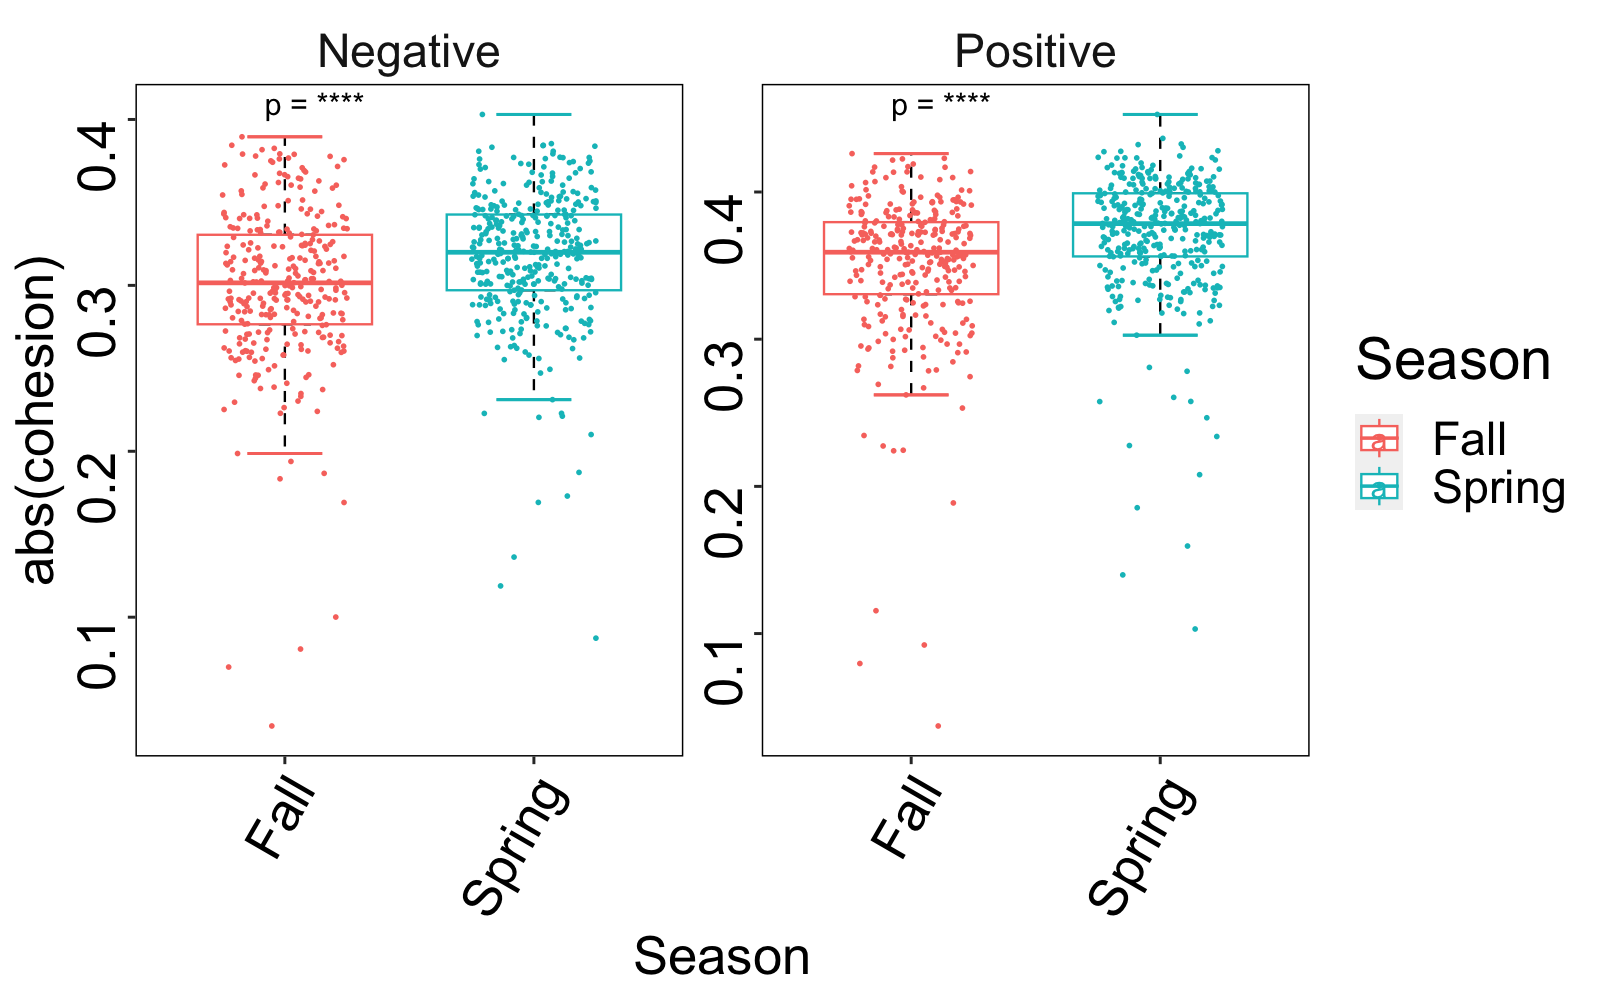

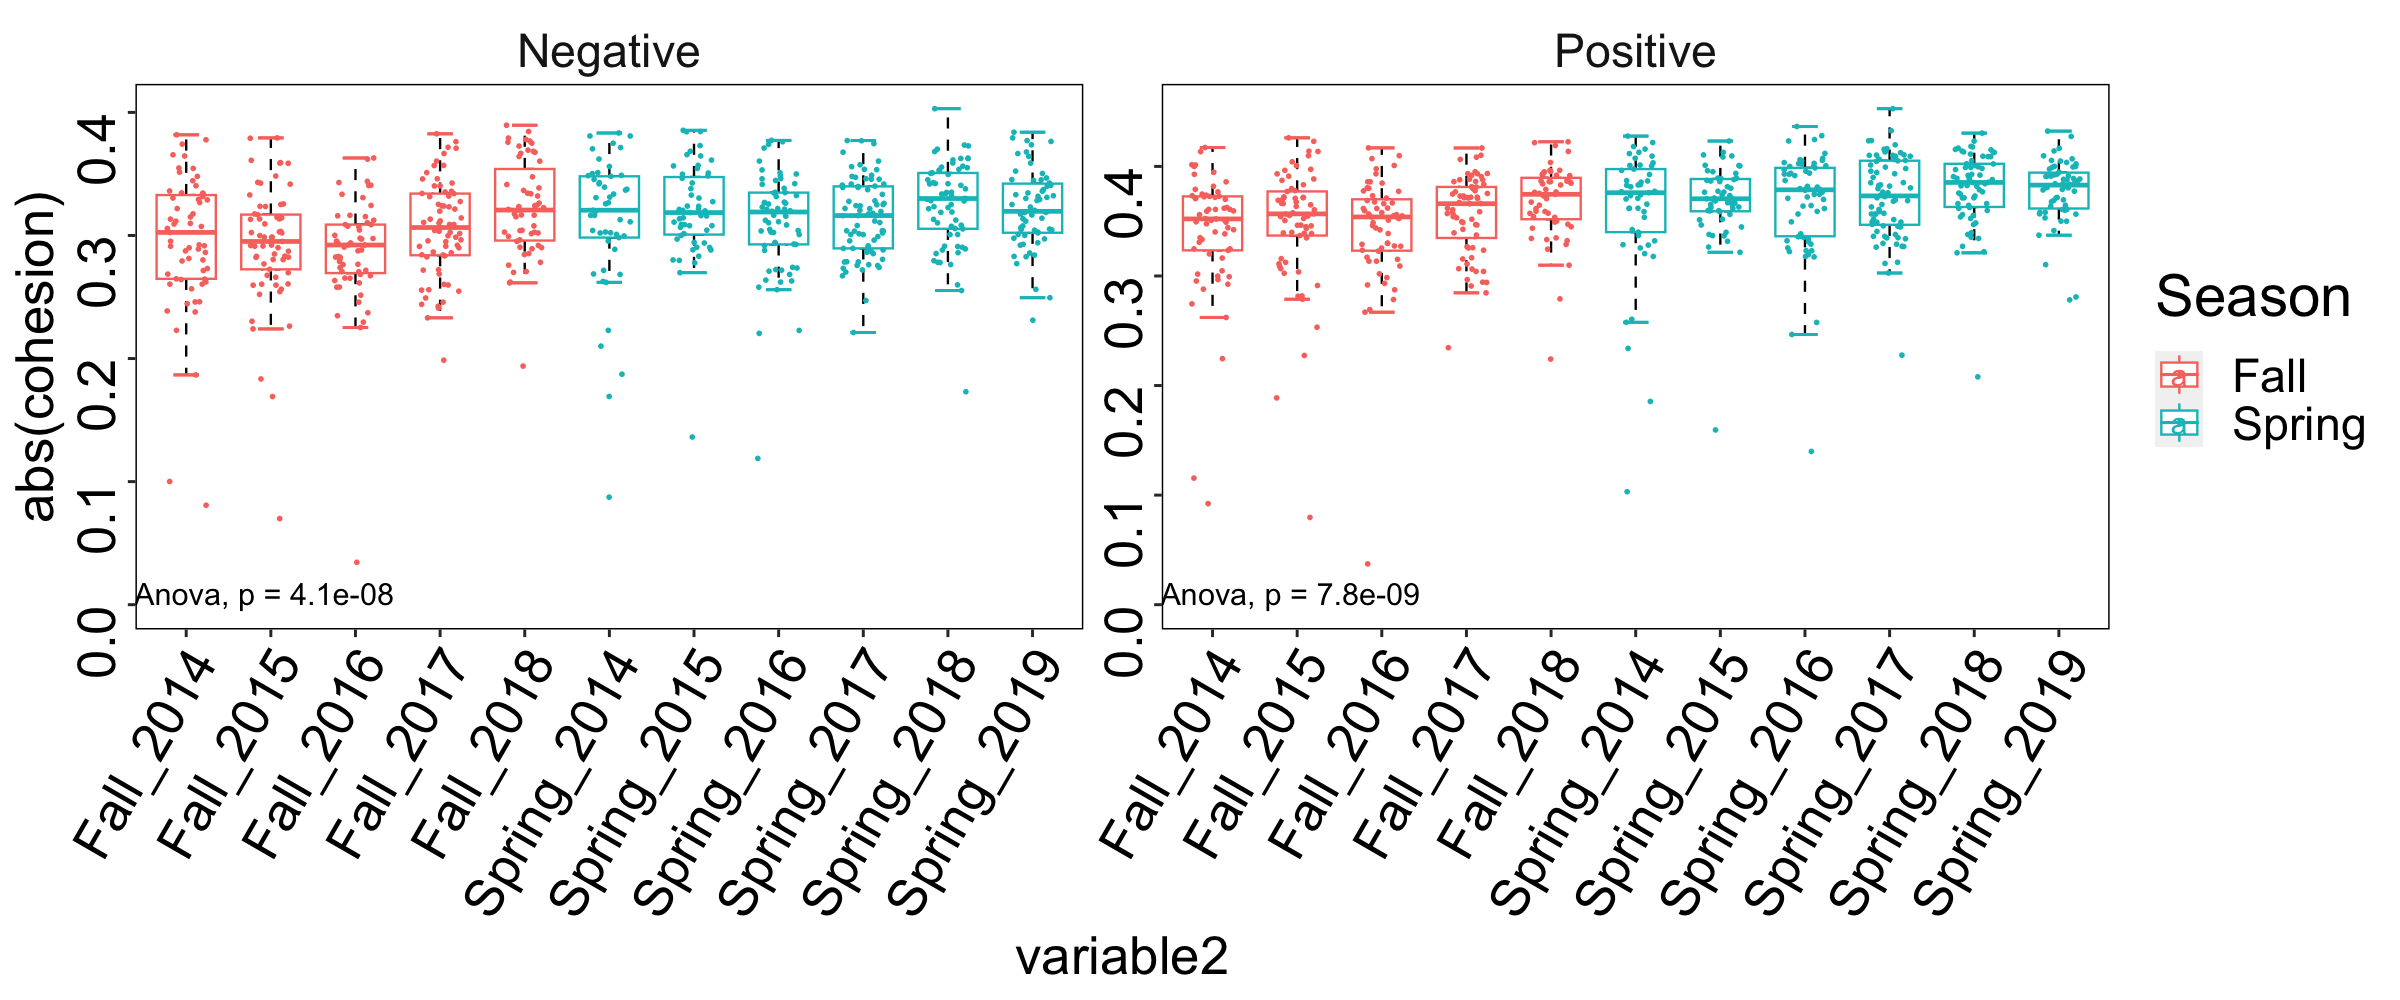

In [31]:
#per season
p = ggplot(dfall, aes(Season, abs(cohesion) , colour =Season )) +           
  geom_boxplot(color="black"  , outlier.shape=NA ,width=0.2 , lwd = 0.4 ,linetype = "dashed" , 
                position = position_dodge(width=6))  + facet_wrap(.~coralation_type , scales = 'free') +
 stat_boxplot(aes(ymin = ..lower.., ymax = ..upper..) ,outlier.shape=NA ,width=0.7 , lwd = 0.4) +
  stat_boxplot(geom = "errorbar", aes(ymin = ..ymax..), width=0.3) +
  stat_boxplot(geom = "errorbar", aes(ymax = ..ymin..) ,width=0.3) +  geom_jitter(size = 0.3 , width = 0.25) +
  scale_fill_manual(values=c("#57CC20", "#B1B5B0")) + scale_alpha_manual(values=c(0,5,0.5)) +
  theme(text = element_text(size = 21 , colour = "black"),
        axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 19), 
        axis.text.y = element_text(angle=90, hjust=1 , size = 19 , colour="black" ) , 
        axis.title.y =  element_text(angle=90, size = 19) ,axis.title.x =  element_text(size = 19) ,
        panel.background = element_rect(colour = "black" , fill = "NA"),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank() ,
        plot.title = element_text(hjust = 0.5) ,
        strip.background = element_rect(fill=NA)) + 
  stat_compare_means(aes(label = paste0("p = ", ..p.signif..)) , method = "wilcox.test") 
options(repr.plot.width = 8, repr.plot.height =5, repr.plot.res = 200 )
p
ggsave("plots/cohesion_season.pdf",p , width = 8 , height = 5)



#per time point
dfall1 = dfall
dfall1$variable = paste(dfall1$Season,dfall1$taxa , sep='_')
dfall1$variable2 = paste(dfall1$Season,dfall1$Year , sep='_')

p = ggplot(dfall1, aes(variable2, abs(cohesion) , colour =Season )) +           
  geom_boxplot(color="black"  , outlier.shape=NA ,width=0.2 , lwd = 0.4 ,linetype = "dashed" , 
                position = position_dodge(width=6))  + facet_wrap(.~coralation_type , scales = 'free') +
 stat_boxplot(aes(ymin = ..lower.., ymax = ..upper..) ,outlier.shape=NA ,width=0.7 , lwd = 0.4) +
  stat_boxplot(geom = "errorbar", aes(ymin = ..ymax..), width=0.3) +
  stat_boxplot(geom = "errorbar", aes(ymax = ..ymin..) ,width=0.3) +  geom_jitter(size = 0.3 , width = 0.25) +
  scale_fill_manual(values=c("#57CC20", "#B1B5B0")) + scale_alpha_manual(values=c(0,5,0.5)) +
  theme(text = element_text(size = 21 , colour = "black"),
        axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 19), 
        axis.text.y = element_text(angle=90, hjust=1 , size = 19 , colour="black" ) , 
        axis.title.y =  element_text(angle=90, size = 19) ,axis.title.x =  element_text(size = 19) ,
        panel.background = element_rect(colour = "black" , fill = "NA"),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank() ,
        plot.title = element_text(hjust = 0.5) ,
        strip.background = element_rect(fill=NA)) + 
    stat_compare_means(method = "anova", label.y = c(0))     # Add global p-value
options(repr.plot.width = 12, repr.plot.height =5, repr.plot.res = 200 )
p

ggsave("plots/cohesion_per_timepoint.pdf",p , width = 12 , height = 5)





---
### cohesion and environmental plots (use same dataframe as before (dfall))

site_season_year sampleN cohesion   coralation_type Season Year sy       Site
1 ERG_Fall_2014    S98      0.3767384 Positive        Fall   2014 Fall2014 ERG 
2 ERG_Fall_2014    S99     -0.3404006 Negative        Fall   2014 Fall2014 ERG 
3 ERG_Fall_2014    S96     -0.3445119 Negative        Fall   2014 Fall2014 ERG 
4 ERG_Fall_2014    S31     -0.2715158 Negative        Fall   2014 Fall2014 ERG 
5 ERG_Fall_2014    S101     0.1155234 Positive        Fall   2014 Fall2014 ERG 
6 ERG_Fall_2014    S38     -0.3288993 Negative        Fall   2014 Fall2014 ERG 
  Actual_Evapotranspiration Climate_Water_Deficit ⋯ Min_Temperature
1 -0.7926453                -0.4414818            ⋯ 0.9906967      
2 -0.7926453                -0.4414818            ⋯ 0.9906967      
3 -0.7926453                -0.4414818            ⋯ 0.9906967      
4 -0.7926453                -0.4414818            ⋯ 0.9906967      
5 -0.7926453                -0.4414818            ⋯ 0.9906967      
6 -0.7926453                -0.4414818            ⋯ 0.9906967      
  Palmer_Drought_Severity_Index Potential_Evapotranspiration Precipitation
1 1.758904                      -0.834173                    0.8456586    
2 1.758904                      -0.834173                    0.8456586    
3 1.758904                      -0.834173                    0.8456586    
4 1.758904                      -0.834173                    0.8456586    
5 1.758904                      -0.834173                    0.8456586    
6 1.758904                      -0.834173                    0.8456586    
  Runoff   Snow_Water_Equivalent Soil_Moisture Vapor_Pressure
1 2.596566 -0.2888801            0.4487293     1.202501      
2 2.596566 -0.2888801            0.4487293     1.202501      
3 2.596566 -0.2888801            0.4487293     1.202501      
4 2.596566 -0.2888801            0.4487293     1.202501      
5 2.596566 -0.2888801            0.4487293     1.202501      
6 2.596566 -0.2888801            0.4487293     1.202501      
  Vapor_Pressure_Deficit Wind_Speed
1 -0.5291563             -1.644832 
2 -0.5291563             -1.644832 
3 -0.5291563             -1.644832 
4 -0.5291563             -1.644832 
5 -0.5291563             -1.644832 
6 -0.5291563             -1.644832

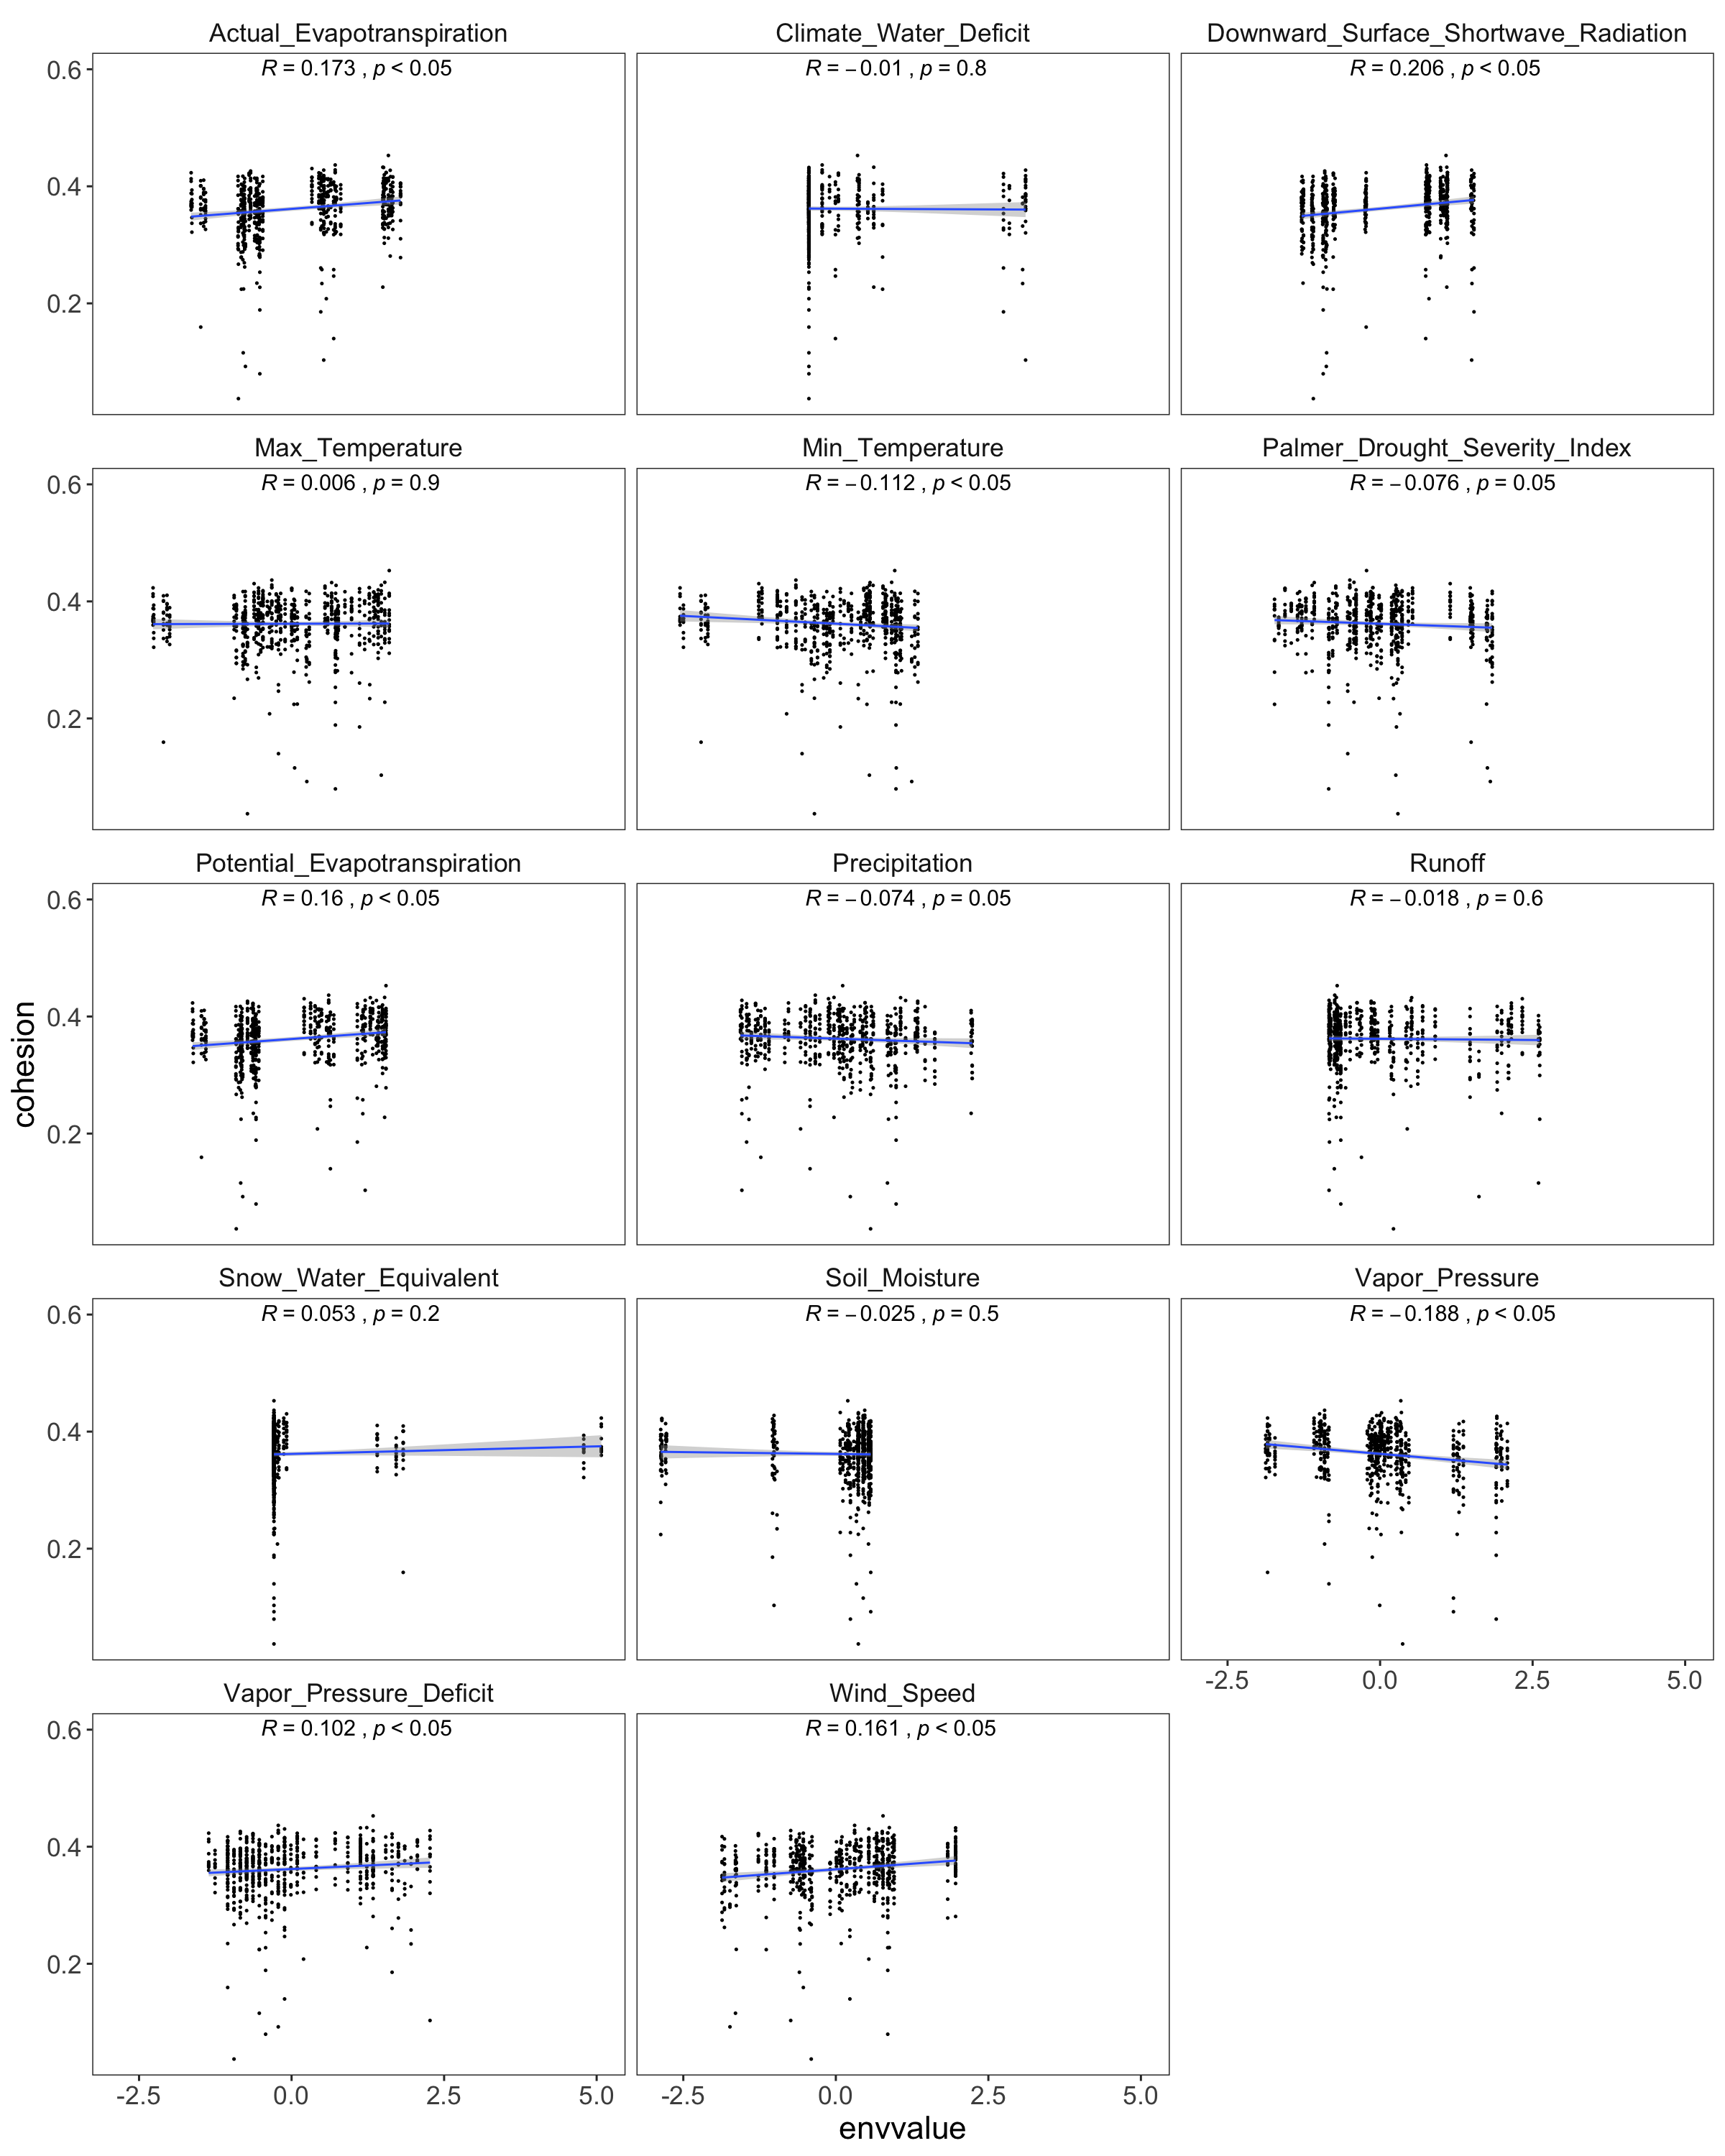

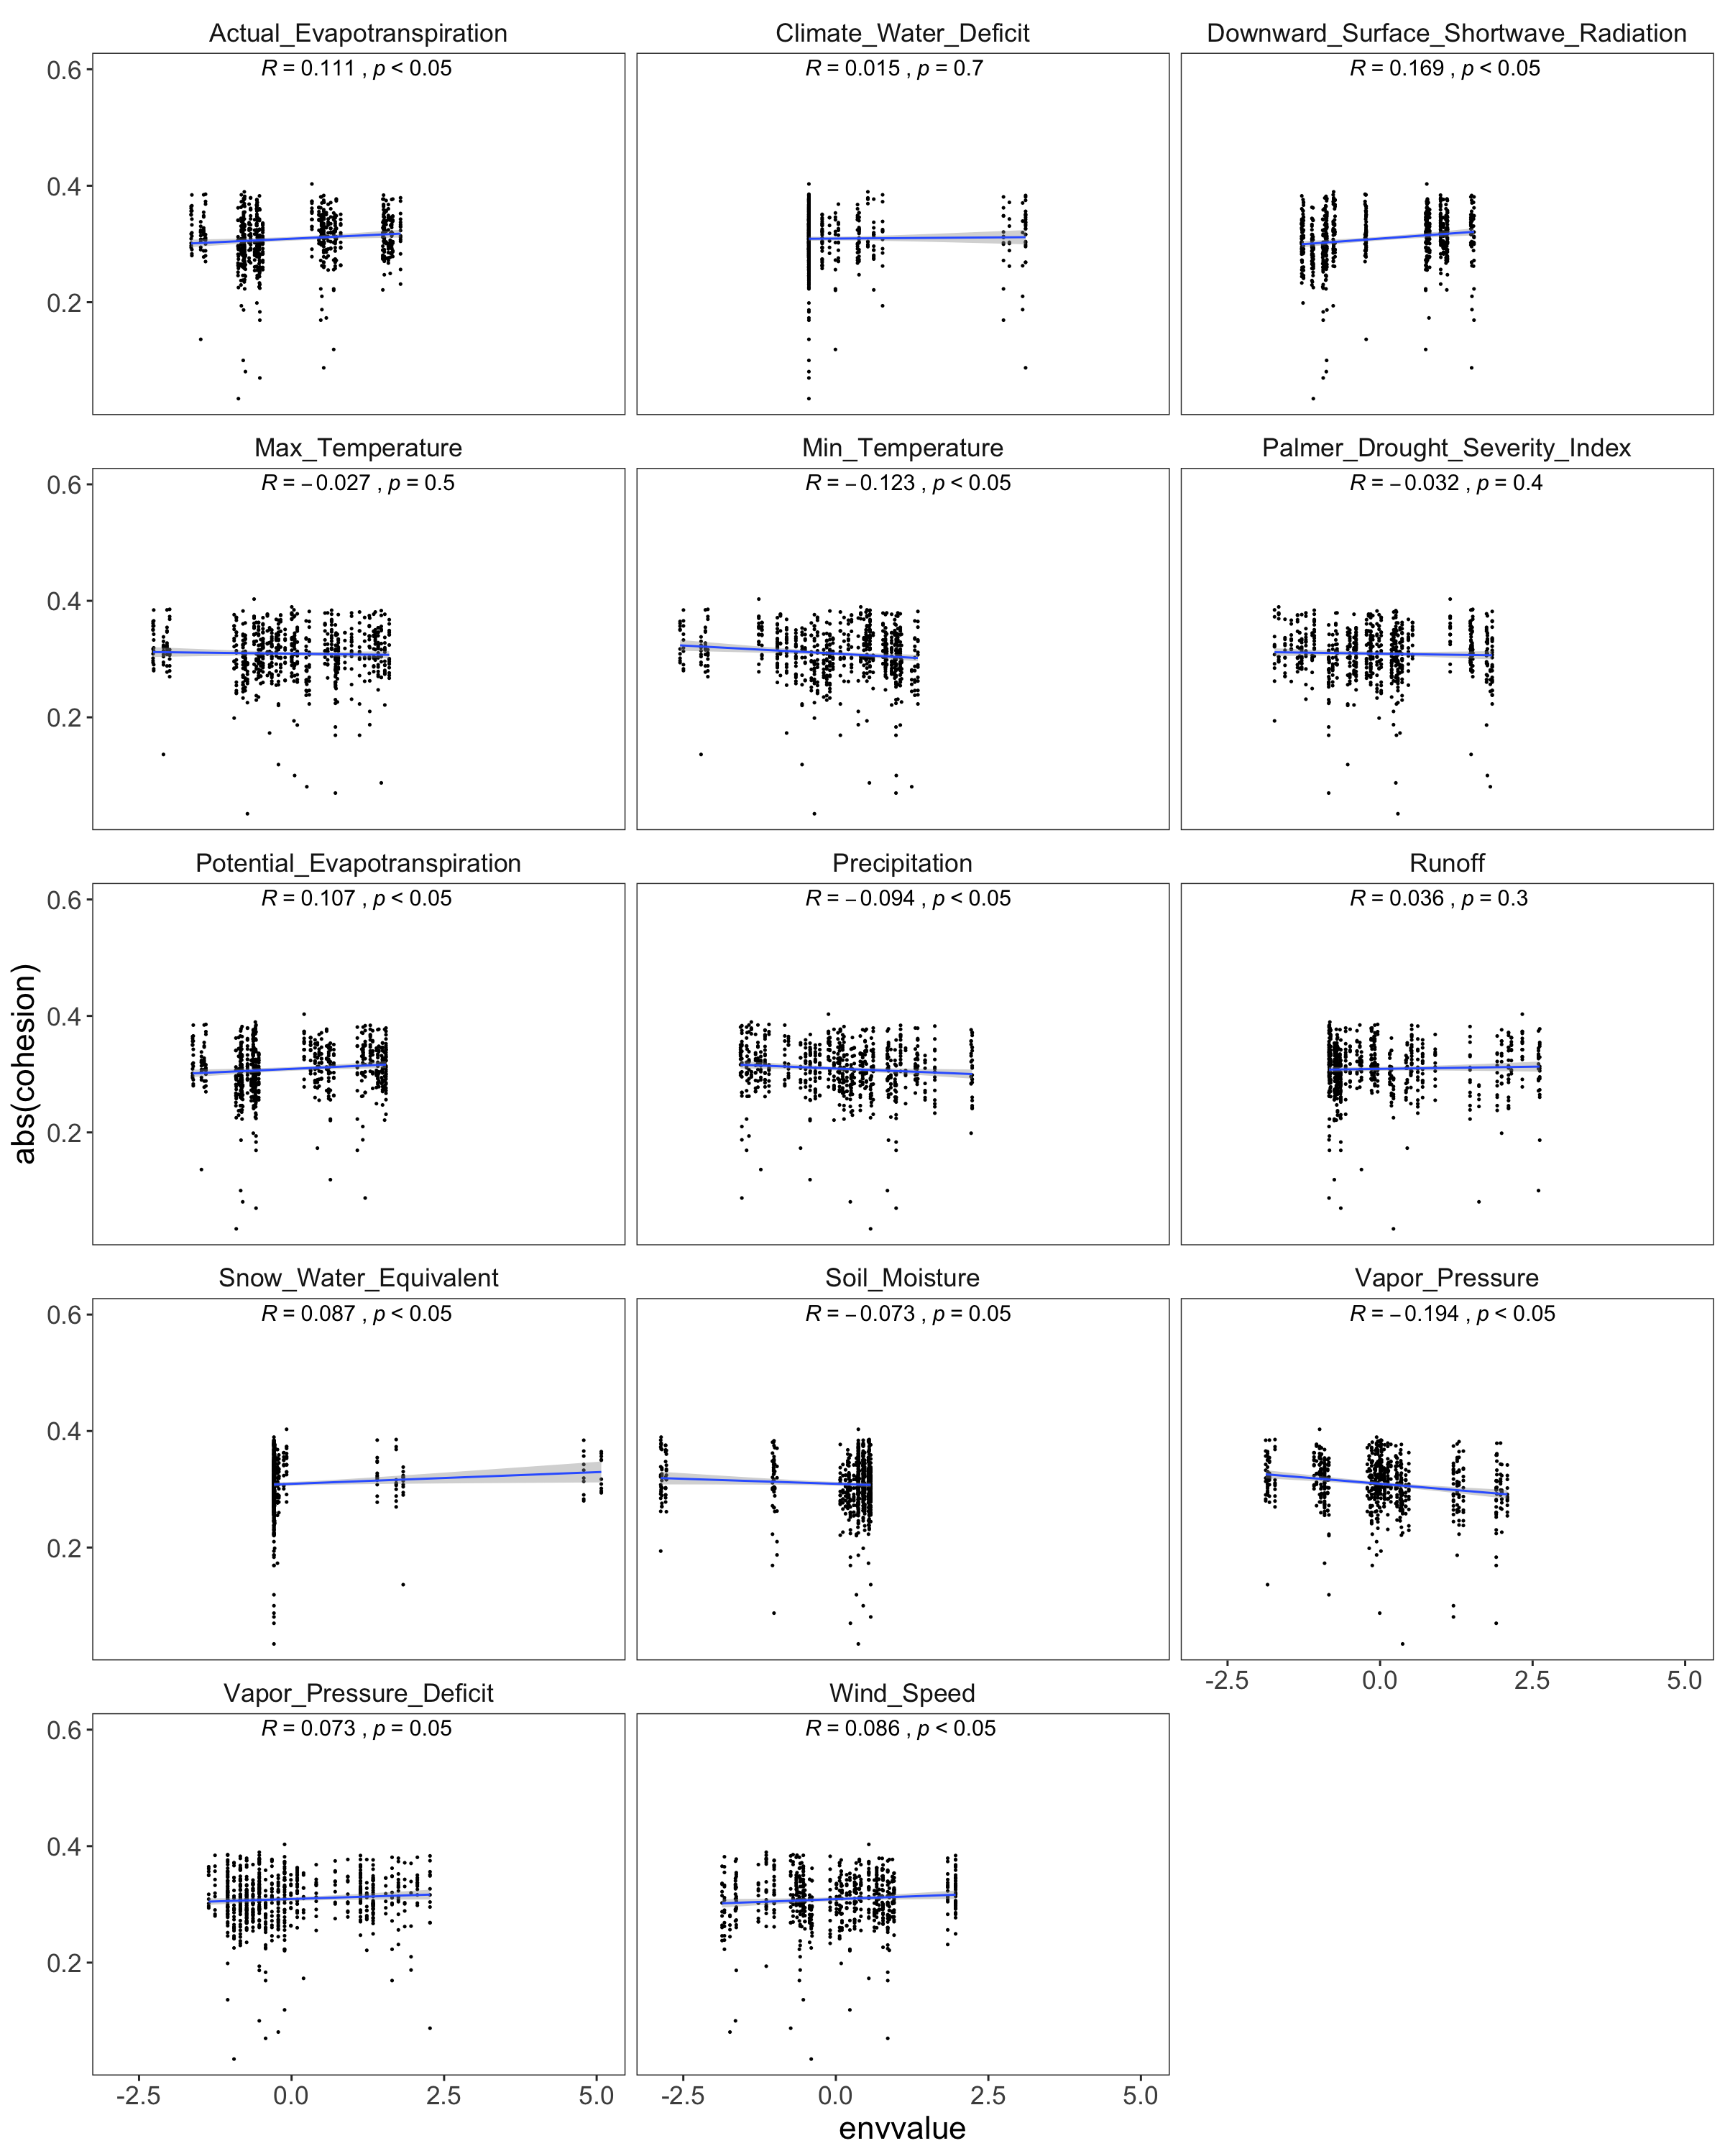

In [35]:
head(dfall)
dfall1 = dfall[-c(1,2,6 ,7 ,8)]
dfall2 = melt(dfall1 , id= c("cohesion" , 'coralation_type' , 'Season'),variable.name ="Envfactor" , value.name = "envvalue" )



p1 = ggplot(dfall2[dfall2$coralation_type =='Positive' ,], aes(envvalue, cohesion)) +           
  geom_point(size = 0.2) +                                  
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth" ,size = 0.5) + facet_wrap(.~Envfactor , nrow =5)  + scale_colour_manual(values = c("blue", "orange" , "darkgreen")) + theme_bw() + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() , strip.background = element_blank() , text = element_text(size = 16)) + 
stat_cor(method = "pearson", label.x = -0.5, label.y = c(0.6,0.7,0.8), p.accuracy = 0.05, r.accuracy = 0.001 ,  aes(label = paste(..r.label.., ..p.label.., sep = "~`,`~"))) 

ggsave("plots/positiveCohesion_EnvironmentalFactor.pdf",p1 , width = 12 , height = 13)
options(repr.plot.width = 12, repr.plot.height =15, repr.plot.res = 200 )
p1



p2 = ggplot(dfall2[dfall2$coralation_type =='Negative' ,], aes(envvalue, abs(cohesion))) +           
  geom_point(size = 0.2) +                                  
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth" ,size = 0.5) + facet_wrap(.~Envfactor , nrow =5)  + scale_colour_manual(values = c("blue", "orange" , "darkgreen")) + theme_bw() + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() , strip.background = element_blank() , text = element_text(size = 16)) + 
stat_cor(method = "pearson", label.x = -0.5, label.y = c(0.6,0.7,0.8), p.accuracy = 0.05, r.accuracy = 0.001 ,  aes(label = paste(..r.label.., ..p.label.., sep = "~`,`~"))) 

ggsave("plots/NegativeCohesion_EnvironmentalFactor.pdf",p2 , width = 12 , height = 13)
options(repr.plot.width = 12, repr.plot.height =15, repr.plot.res = 200 )
p2

---
### alpha diversity and cohesion (for cohesion use same data frame dfall) for alpha-diversity either use files from 'alpha-diversity-EnvironmentalFactor.ipynb' script or calculate here ('div' dataframe ) and merge it with cohesion files (positive and negative) from dfall dataframe (final fails are dfP and dfN)


In [42]:
library(phyloseq)

#Bacteria alpha diversity
#open otu table
Otu1 = read.table("data/DataClean/BV5Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
n = which(colnames(Otu1)=='Otu000002')  
n
sam_otu = Otu1[-c(1:14)] #n-1 
sam_otu = sam_otu[rowSums(sam_otu)!=0,]
sample = Otu1[c(1:14)] #n-1
sample = sample[rownames(sample) %in% rownames(sam_otu),]
identical(row.names(sample),row.names(sam_otu)) 

#make phyloseq input files
otusam <- otu_table(sam_otu , taxa_are_rows = FALSE,errorIfNULL = TRUE)
samples <- sample_data(sample)
file <- phyloseq(otusam,samples)

#mesure alpha diversity
rich = estimate_richness(file,measures = c("Observed", "Chao1", "Shannon"))
rich = select(rich , -c(3))
rich1 = merge(rich,data.frame(sample_data(file)),by=0)
richB = select(rich1 , -c(1))
richB$Taxa = 'Bacteria'
head(env_data_melt)
#---------------------------------------------------------------------------------------------
#For Fungi
Otu1 = read.table("data/DataClean/FITS2Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
n = which(colnames(Otu1)=='Otu00002') 
n

sam_otu = Otu1[-c(1:14)] #n-1
sam_otu = sam_otu[rowSums(sam_otu)!=0,]
sample = Otu1[c(1:14)] #n-1
sample = sample[rownames(sample) %in% rownames(sam_otu),]
identical(row.names(sample),row.names(sam_otu)) 
#make phyloseq input files

#otu-sample matrix
#phloseqfiles
otusam <- otu_table(sam_otu , taxa_are_rows = FALSE,errorIfNULL = TRUE)
samples <- sample_data(sample)
file <- phyloseq(otusam,samples)

rich = estimate_richness(file,measures = c("Observed", "Chao1", "Shannon"))
rich = select(rich , -c(3))
rich1 = merge(rich,data.frame(sample_data(file)),by=0)
richF = select(rich1 , -c(1))
richF$Taxa = 'Fungi'

#---------------------------------------------------------------------------------------------
#For Eukaryotes

Otu1 = read.table("data/DataClean/PV9Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
n = which(colnames(Otu1)=='Otu00002') 
n

sam_otu = Otu1[-c(1:14)] #n-1
sam_otu = sam_otu[rowSums(sam_otu)!=0,]
sample = Otu1[c(1:14)] #n-1
sample = sample[rownames(sample) %in% rownames(sam_otu),]
identical(row.names(sample),row.names(sam_otu)) 
#make phyloseq input files

#otu-sample matrix
#phloseqfiles
otusam <- otu_table(sam_otu , taxa_are_rows = FALSE,errorIfNULL = TRUE)
samples <- sample_data(sample)
file <- phyloseq(otusam,samples)


rich = estimate_richness(file,measures = c("Observed", "Chao1", "Shannon"))
rich = select(rich , -c(3))
rich1 = merge(rich,data.frame(sample_data(file)),by=0)
richE = select(rich1 , -c(1))
richE$Taxa = 'Eukaryotes'

#----------------------------------------------------------------------------------------------------
#combine files
div = rbind(richB , richF ,richE)
div$site_season_year = paste(div$Site,div$Season,div$Year, sep = '_')
head(div)


#----------------------------------------------------------------------------------------------------
# merge cohesion with alpha diversity

dfP <- merge(div[c('Shannon' ,'Samplenumber' ,'Season' , 'Year')] ,dfall[dfall$coralation_type=='Positive' ,c(2,3,4)] ,by.x='Samplenumber'  , by.y = 'sampleN')
dfN <- merge(div[c('Shannon' ,'Samplenumber' ,'Season' , 'Year')] ,dfall[dfall$coralation_type=='Negative' ,c(2,3,4)] ,by.x='Samplenumber'  , by.y = 'sampleN')


[1] 15

[1] TRUE

site_season_year env_factor                env_value_norm
1 ERG_Fall_2014    Actual_Evapotranspiration -0.7926453    
2 ERG_Fall_2015    Actual_Evapotranspiration -0.6715747    
3 ERG_Fall_2016    Actual_Evapotranspiration -0.8773947    
4 ERG_Fall_2017    Actual_Evapotranspiration -0.5686647    
5 ERG_Fall_2018    Actual_Evapotranspiration -0.5747183    
6 ERG_Spring_2014  Actual_Evapotranspiration  0.5330773

[1] 15

[1] TRUE

[1] 15

[1] TRUE

Observed Chao1      Shannon  Lib Run Samplenumber Site Season Year Infection
1  577      634.98701 4.951092 B45 B   S1           WH   Spring 2014 Healthy  
2 1541     1783.62673 6.028060 F24 F   S10          WH   Fall   2014 Infected 
3  190      241.20690 2.028143 H21 H   S100         ERG  Fall   2014 Healthy  
4   64       68.58824 3.512665 C11 C   S101         ERG  Fall   2014 Healthy  
5   75       90.00000 1.958822 H4  H   S102         ERG  Fall   2014 Healthy  
6  121      140.71429 4.008650 H40 H   S103         ERG  Spring 2015 Healthy  
  Compartment SamplingingStage TimePoint  CompSamplingStage
1 Epi         Old              Spring2014 EpiOld           
2 Epi         Old              Fall2014   EpiOld           
3 Endo        Old              Fall2014   EndoOld          
4 Endo        Old              Fall2014   EndoOld          
5 Endo        Old              Fall2014   EndoOld          
6 Endo        Old              Spring2015 EndoOld          
  CompSeasonSamplingStage TotalReads numOTUs Taxa     site_season_year
1 EpiSpringOld            16914      5502    Bacteria WH_Spring_2014  
2 EpiFallOld              23622      5502    Bacteria WH_Fall_2014    
3 EndoFallOld             13268      5502    Bacteria ERG_Fall_2014   
4 EndoFallOld               457      5502    Bacteria ERG_Fall_2014   
5 EndoFallOld              1467      5502    Bacteria ERG_Fall_2014   
6 EndoSpringOld            1661      5502    Bacteria ERG_Spring_2015

----
### plot cohesion(positive and negative) and alpha diversity using dfP and dfN dataframes per season.


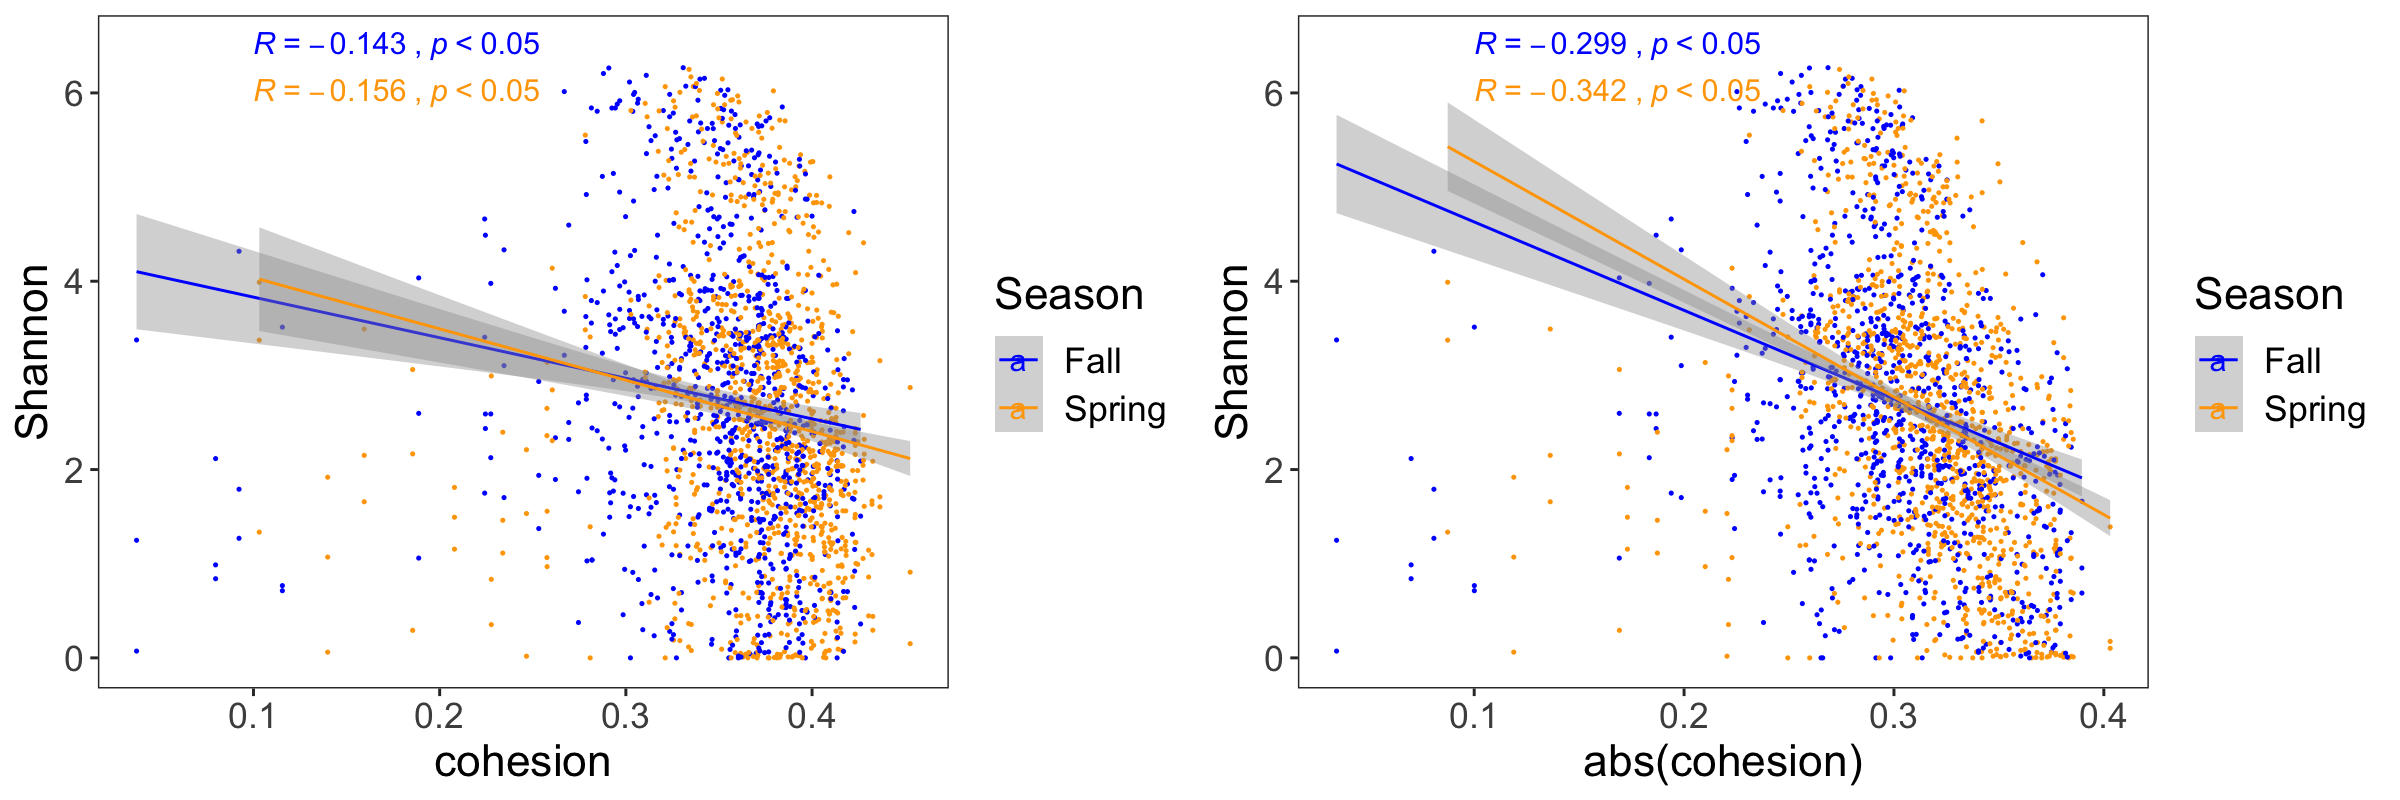

In [53]:
p1 =  ggplot(dfP, aes(cohesion,Shannon ,  colour = Season)) +           
  geom_point(size = 0.2) +                                  
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth" ,size = 0.5) + scale_colour_manual(values = c("blue", "orange" , "darkgreen")) + theme_bw() + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() , strip.background = element_blank() , text = element_text(size = 16)) + 
stat_cor(method = "pearson", label.x = 0.1, label.y = c(6.5,6), p.accuracy = 0.05, r.accuracy = 0.001 ,  aes(label = paste(..r.label.., ..p.label.., sep = "~`,`~"))) 
options(repr.plot.width = 6, repr.plot.height =5, repr.plot.res = 200 )


p2 =  ggplot(dfN, aes(abs(cohesion),Shannon ,  colour = Season)) +           
  geom_point(size = 0.2) +                                  
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth" ,size = 0.5)  + scale_colour_manual(values = c("blue", "orange" , "darkgreen")) + theme_bw() + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() , strip.background = element_blank() , text = element_text(size = 16)) + 
stat_cor(method = "pearson", label.x = 0.1, label.y = c(6.5,6), p.accuracy = 0.05, r.accuracy = 0.001 ,  aes(label = paste(..r.label.., ..p.label.., sep = "~`,`~"))) 
options(repr.plot.width = 6, repr.plot.height =5, repr.plot.res = 200 )



ggsave( "plots/cohesion_alphaDiversity.pdf" , ggarrange(p1,p2 , nrow=1 , ncol = 2 , vjust = TRUE)  , width = 12 ,height = 4)

options(repr.plot.width = 12, repr.plot.height =4, repr.plot.res = 200 )
ggarrange(p1,p2 , nrow=1 , ncol = 2 , vjust = TRUE)


---
##### beta diversity and cohesion (for cohesion use same data frame dfall) for beta-diversity distance between samples (distance to centroid of each season) were calculated. This will give us a dataframe as same length of number of samples (dataframe called 'dis_to_center'). This data was merged to cohesion information (dfall).  Final table called 'dfall_distance' and used to plot cohesion and distance plot per season.


In [56]:
library(vegan)
#For Bacteria
data <- read.table("data/DataClean/BV5Otu.txt" , header = T)
firstotuname = "Otu000002"
#head(data)
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)
data1 <- data[-c(1:n-1)]
metadata = data[c(1:n-1)]

log_transform=function(x) {log10((x/rowSums(x))+1)}
#log_transform=function(x) {(x/rowSums(x))}
df <- log_transform(data1)
identical(rownames(df) , rownames(metadata))

#info_distance = betadisper(vegdist(df, method="bray"), type = c("centroid"), bias.adjust = TRUE)
info_distance = betadisper(vegdist(df, method="bray"), metadata$Season, type = c("centroid"), bias.adjust = TRUE)
dis_to_center = data.frame(info_distance$distances)
colnames(dis_to_center) = "distance"
dis_to_center1  = merge(dis_to_center , metadata  , by = "row.names")
dfB = dis_to_center1
dfB$taxa = "Bac"

#Fungi
data <- read.table("data/DataClean/FITS2Otu.txt" , header = T)
firstotuname = "Otu00002"
#head(data)
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)
data1 <- data[-c(1:n-1)]
metadata = data[c(1:n-1)]

log_transform=function(x) {log10((x/rowSums(x))+1)}
#log_transform=function(x) {(x/rowSums(x))}
df <- log_transform(data1)
identical(rownames(df) , rownames(metadata))

#info_distance = betadisper(vegdist(df, method="bray"), type = c("centroid"), bias.adjust = TRUE)
info_distance = betadisper(vegdist(df, method="bray"), metadata$Season, type = c("centroid"), bias.adjust = TRUE)
dis_to_center = data.frame(info_distance$distances)
colnames(dis_to_center) = "distance"
dis_to_center1  = merge(dis_to_center , metadata  , by = "row.names")
dfF = dis_to_center1
dfF$taxa = "Fun"

#Eukaryotes
data <- read.table("data/DataClean/PV9Otu.txt" , header = T)
firstotuname = "Otu00002"
#head(data)
rownames(data) <- data$Samplenumber
n <- which(colnames(data)==firstotuname)
data1 <- data[-c(1:n-1)]
metadata = data[c(1:n-1)]

log_transform=function(x) {log10((x/rowSums(x))+1)}
#log_transform=function(x) {(x/rowSums(x))}
df <- log_transform(data1)
identical(rownames(df) , rownames(metadata))

#info_distance = betadisper(vegdist(df, method="bray"), type = c("centroid"), bias.adjust = TRUE)
info_distance = betadisper(vegdist(df, method="bray"), metadata$Season, type = c("centroid"), bias.adjust = TRUE)
dis_to_center = data.frame(info_distance$distances)
colnames(dis_to_center) = "distance"
dis_to_center1  = merge(dis_to_center , metadata  , by = "row.names")
dfO = dis_to_center1
dfO$taxa = "Euk"

dfall_distance = rbind(dfB,dfF,dfO)

dfP <- merge(dfall_distance,dfall[dfall$coralation_type=='Positive' ,c(2,3,4)] ,by.x='Samplenumber'  , by.y = 'sampleN')
dfN <- merge(dfall_distance,dfall[dfall$coralation_type=='Negative' ,c(2,3,4)] ,by.x='Samplenumber'  , by.y = 'sampleN')

[1] TRUE

[1] TRUE

[1] TRUE

---
#### plot cohesion(positive and negative) and beta diversity using dfP and dfN dataframes per season.

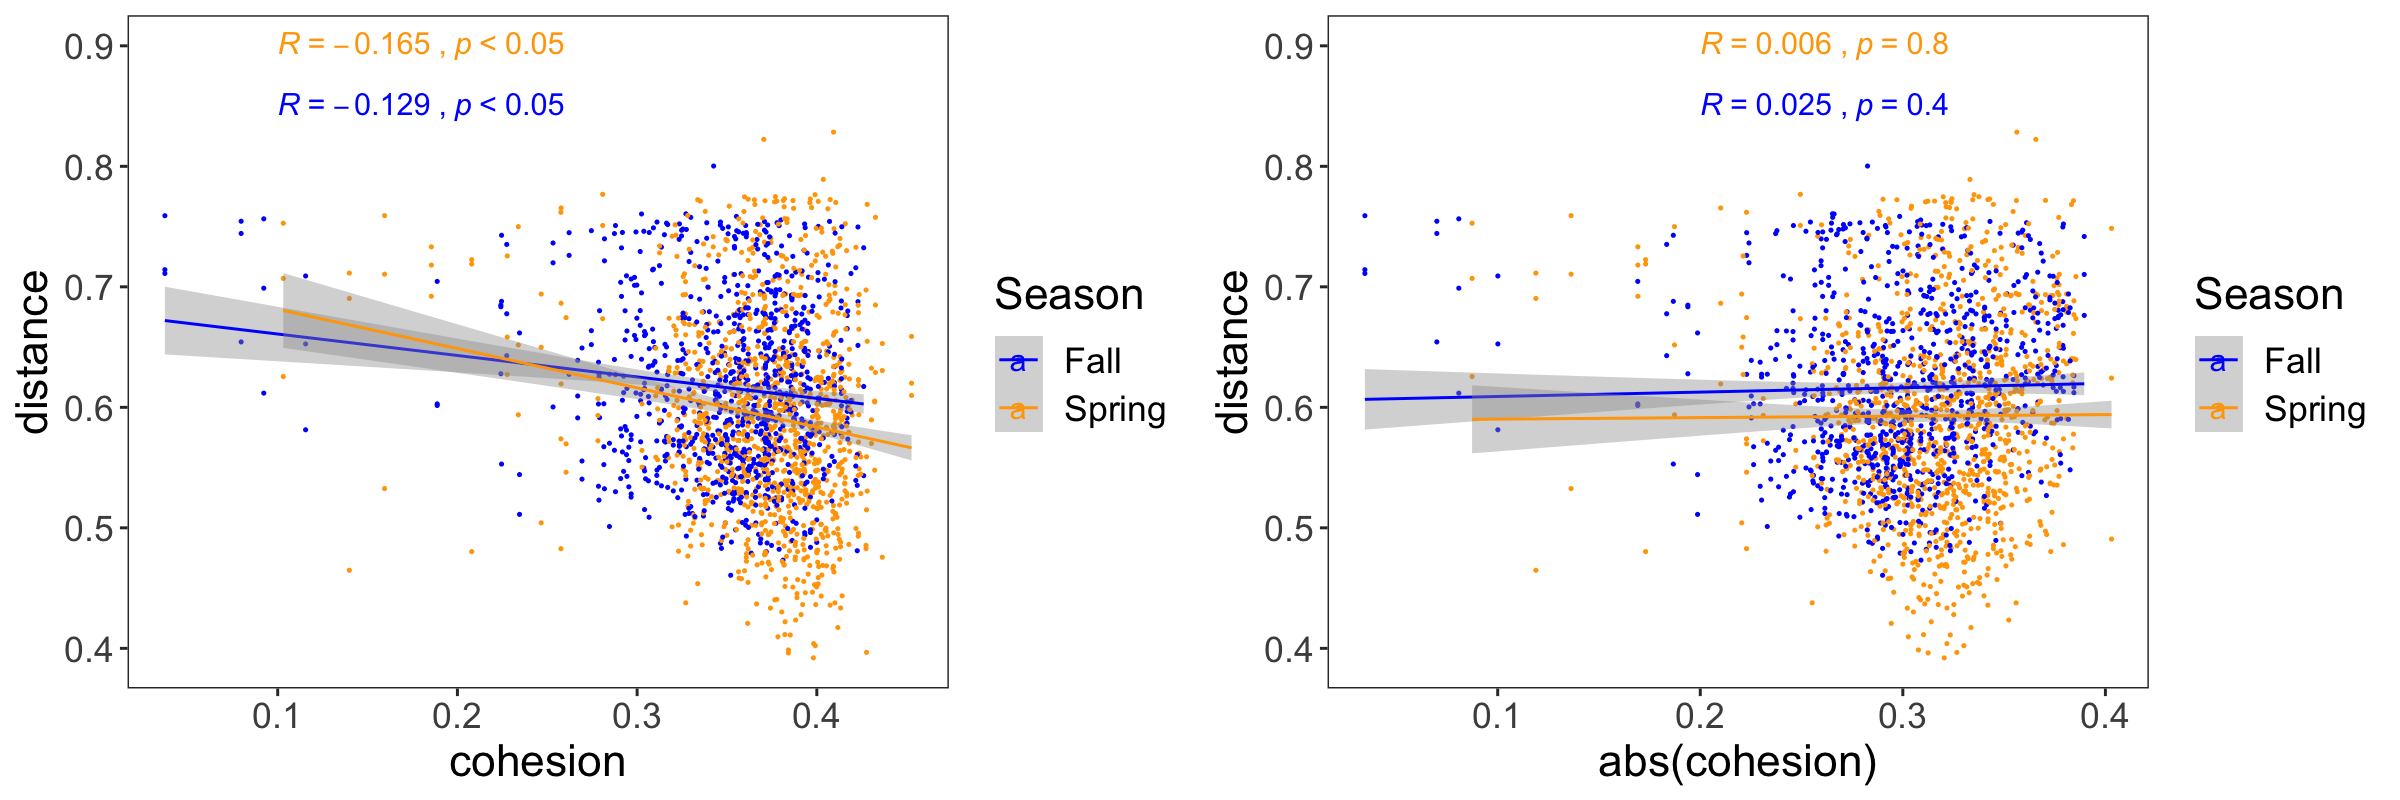

In [58]:
p1 =  ggplot(dfP, aes(cohesion,distance ,  colour = Season)) +           
  geom_point(size = 0.2) +                                  
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth" ,size = 0.5)  + scale_colour_manual(values = c("blue", "orange" , "darkgreen")) + theme_bw() + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() , strip.background = element_blank() , text = element_text(size = 16)) + 
stat_cor(method = "pearson", label.x = 0.1, label.y = c(0.85,0.9), p.accuracy = 0.05, r.accuracy = 0.001 ,  aes(label = paste(..r.label.., ..p.label.., sep = "~`,`~"))) 
options(repr.plot.width = 12, repr.plot.height =5, repr.plot.res = 200 )


p2 =  ggplot(dfN, aes(abs(cohesion),distance ,  colour = Season)) +           
  geom_point(size = 0.2) +                                  
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth" ,size = 0.5) + scale_colour_manual(values = c("blue", "orange" , "darkgreen")) + theme_bw() + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() , strip.background = element_blank() , text = element_text(size = 16)) + 
stat_cor(method = "pearson", label.x = 0.2, label.y = c(0.85,0.9), p.accuracy = 0.05, r.accuracy = 0.001 ,  aes(label = paste(..r.label.., ..p.label.., sep = "~`,`~"))) 
options(repr.plot.width = 12, repr.plot.height =5, repr.plot.res = 200 )


ggsave( "plots/cohesion_betaDiversity.pdf" , ggarrange(p1,p2 , nrow=2,ncol=2  , vjust = TRUE)  , width = 12 ,height = 4 )

options(repr.plot.width = 12, repr.plot.height =4, repr.plot.res = 200 )
ggarrange(p1,p2 , nrow=1 , ncol = 2 , vjust = TRUE)